### Exploring Spatial Dynamics of Dog Ownership in Zurich

#### Problem Statement (Hypothesis Formation):
How can we strategically leverage data on dog owners in Zurich, population demographics, income levels, and household sizes across its 34 neighborhoods to gain insights into dog ownership patterns, predict future trends, and provide actionable recommendations for stakeholders?

#### Context:
The city of Zurich is embarking on a comprehensive exploration of dog ownership dynamics within its neighborhoods. This initiative responds to a gradual shift in popularity from larger to smaller breed dogs, coupled with a noticeable uptick in pet dog ownership since the removal of mandatory dog training course requirements in 2017. The city's objectives are to inform urban planning, support pet service businesses, and enhance the overall well-being of residents and their pets. Our analysis focuses on uncovering spatial patterns, identifying factors influencing dog ownership, and offering predictive insights for future planning.

#### Criteria for Success:
The project will be considered successfully completed when the predictive models consistently achieve a Mean Absolute Error (MAE) below 10% in forecasting the number of dog owners in Zurich's 34 neighborhoods for 2024.

#### Constraints within Solution Space:
- **Breed Consideration:** The analysis will consider data for pure breed dogs, excluding mix breed dogs to avoid potential confusions and complexities. May come back to mix breeds after or use it if we are considering dogs in general.
- **Temporal Constraints:** The analysis and modeling efforts are constrained to the overlapping years of the datasets which are from 2015 to 2020.

#### Stakeholders:
- **City Planners:** Interested in understanding spatial patterns to inform urban planning policies.
- **Businesses:** Seeking insights for marketing strategies and service offerings related to pet services.
- **Local Authorities:** Interested in enhancing the well-being of residents and their pets through informed decisions.
- **Pet Owners:** Seeking insights to ensure puppies can socialize effectively, and dogs receive appropriate contact and care.

#### Key Data Sources:
- **Geometry Data:** [Link to Geometry Data](https://data.stadt-zuerich.ch/dataset/geo_statistische_quartiere)
- **Dog Owners Data:** [Link to Dog Owners Data](https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001/download/KUL100OD1001.csv)
- **Population Data:** [Link to Population Data](https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_quartier_alter_herkunft_geschlecht_od3903/download/BEV390OD3903.csv)
- **Income Data:** [Link to Income Data](https://data.stadt-zuerich.ch/dataset/fd_median_einkommen_quartier_od1003/download/WIR100OD1003.csv)
- **Household Data:** [Link to Household Data](https://data.stadt-zuerich.ch/dataset/bev_hh_haushaltsgroesse_quartier_seit2013_od3806/download/BEV380OD3806.csv)

These combined data sources will serve as the foundation for our spatial data science analysis, providing insights into dog ownership patterns, demographics, income levels, and household sizes across Zurich's neighborhoods.


THese are reminders in case youforget what you are tryin gto do
Spatial Analysis of Dog Ownership in Zurich
Dog ownership density


- examine the dynamic interplay between demographic factors, such as population density, household size, and income level, with the prevalence of dog ownership. 
- uncover trends, identify business opportunities in the pet dog services sector, and offer tailored, data-driven insights for businesses in each neighborhood.


- Understand the current distribution of dog breeds across Zurich's neighborhoods.
- Apply predictive modeling to forecast changes in the distribution of dog breeds.
- identify spatial clusters and patterns of high or low concentrations of dog owners
- Identify localized patterns using spatial analysis techniques like LISA (Local Indicators of Spatial Association).
- Provide recommendations for businesses, urban planners, and policymakers based on spatial insights.
- Identify trending dog ownership patterns
- correlate population demographics with dog ownership
- Income level influence on dog ownership
- Spatial analysis on dog ownership
- Predictive trends such as rising popularity of certain breeds

"How do demographic factors and neighborhood characteristics influence dog ownership density in Zurich, and how can these insights predict future trends in dog ownership for next 3 years?"


### Imports & Configurations

This section includes the necessary imports for libraries, configuration settings for dataframes and visualizations These components establish the foundational setup for subsequent data analysis and exploration. 


In [1]:
import math
from typing import Optional, Callable
from pathlib import Path
from pprint import pprint
from urllib.request import urlopen
from fiona.io import ZipMemoryFile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoviews as gv
import geoviews.tile_sources as gvts
from thefuzz import fuzz
import hvplot
import hvplot.pandas
import holoviews as hv
from holoviews import streams
import colorcet as cc
import cartopy.crs as ccrs
import panel as pn
import panel.widgets as pnw
from wordcloud import WordCloud
from PIL import ImageDraw, Image
from IPython.display import clear_output
from translate_app import translate_list_to_dict
import helper_functions as hf
import libpysal as lps
from esda.moran import Moran, Moran_Local
from splot.esda import plot_local_autocorrelation

In [2]:
# suppress warnings
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
gv.extension("bokeh")
hv.extension("bokeh")
hvplot.extension("bokeh")
pn.extension()

pn.config.throttled = True
sns.set_style("whitegrid")

clear_output()  # clear the blank lines output from holoviews

#### Column Name Transformation

To enhance readability and ensure consistency, the original column names in the various datasets have been translated from german to english and converted to snake case using our `sanitize_df_column_names` helper function. This transformation results in a cleaner and more standardized DataFrame, making the data easier to work with. 


#### Zurich Statistical Districts Geospatial Data

The city of Zurich is divided into 34 statistical districts, derived from the 12 districts or 22 urban districts. These statistical divisions serve the purpose of spatially differentiating statistical data for administrative tasks within the City of Zurich departments. The divisions are essential for internal administrative functions and contribute to the organization and analysis of statistical information.

The geospatial data for Zurich's statistical districts is organized into a dictionary with abbreviated and standardized keys for enhanced clarity and brevity. The keys now follow a systematic structure:

- `z_gdf_0`: Point data optimized for optimal label positioning on maps.
- `z_gdf_1`: Geospatial data tailored for data visualization and cartographic representations.
- `z_gdf_2`: Geospatial data specifically designed for calculating area information or spatial intersections.

The organizational structure allows for efficient handling and analysis of the geospatial information.



In [3]:
zip_gdf_url = "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_statistical_quarters.zip"
zurich_geo_dicts = hf.get_gdf_from_zip_url(zip_gdf_url)
zurich_desc_path = "../data/zurich_districts.csv"
# small dataframe with a description of each district
zurich_desc = pd.read_csv(zurich_desc_path).drop(columns=["desc_length"])
z_gdf = hf.rename_keys(zurich_geo_dicts, prefix="z_gdf_")

In [4]:
zurich_desc

,district_name,desc,district
0,"Old Town, City Center",The most central district encompasses the hist...,1
1,Left Shore of the Lake,The architecturally attractive Enge Train Stat...,2
2,Creative Quarter of Wiedikon,"Once mainly a working-class neighborhood, the ...",3
3,Creative Quarter of Langstrasse,The district around Langstrasse was long regar...,4
4,Creative Quarter of Zürich-West,In the quarter where huge machines once clatte...,5
5,University Quarter,"University buildings, Jugendstil villas, green...",6
6,On the Zürichberg,"The hillside location, little traffic, and fab...",7
7,Right Shore of the Lake,This district starts behind the Opera House an...,8
8,At the Foot of the Uetliberg,"For a long time, this district was solely know...",9
9,Right of the Limmat,This district boasts a fantastic location: in ...,10


In [5]:
# Look at the data for each of the geodataframes
z_gdf["z_gdf_0"].info()
z_gdf["z_gdf_0"].sample(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  34 non-null     geometry
 1   objid     34 non-null     object  
 2   name      34 non-null     object  
 3   kuerzel   34 non-null     object  
 4   ori       34 non-null     int64   
 5   hali      34 non-null     object  
 6   vali      34 non-null     object  
dtypes: geometry(1), int64(1), object(5)
memory usage: 2.0+ KB


,geometry,objid,name,kuerzel,ori,hali,vali
2,POINT (8.56448 47.41185),3,Saatlen,121,0,1,2
6,POINT (8.54572 47.40839),7,Oerlikon,115,0,1,2
8,POINT (8.58331 47.39840),9,Hirzenbach,123,0,1,2


In [6]:
z_gdf["z_gdf_1"].info()
z_gdf["z_gdf_1"].sample(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  34 non-null     geometry
 1   objectid  34 non-null     int64   
 2   objid     34 non-null     object  
 3   qnr       34 non-null     int64   
 4   qname     34 non-null     object  
 5   knr       34 non-null     int64   
 6   kname     34 non-null     object  
dtypes: geometry(1), int64(3), object(3)
memory usage: 2.0+ KB


,geometry,objectid,objid,qnr,qname,knr,kname
24,"POLYGON ((8.58215 47.38788, 8.58219 47.38794, ...",24,11,71,Fluntern,7,Kreis 7
21,"POLYGON ((8.52717 47.40668, 8.52688 47.40709, ...",17,21,102,Wipkingen,10,Kreis 10
13,"POLYGON ((8.51810 47.34425, 8.51807 47.34433, ...",6,29,23,Leimbach,2,Kreis 2


In [7]:
z_gdf["z_gdf_2"].info()
z_gdf["z_gdf_2"].sample(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  34 non-null     geometry
 1   objid     34 non-null     object  
 2   qnr       34 non-null     int64   
 3   qname     34 non-null     object  
 4   knr       34 non-null     int64   
 5   kname     34 non-null     object  
dtypes: geometry(1), int64(2), object(3)
memory usage: 1.7+ KB


,geometry,objid,qnr,qname,knr,kname
25,"POLYGON ((8.55666 47.36398, 8.55676 47.36391, ...",32,73,Hirslanden,7,Kreis 7
28,"POLYGON ((8.44802 47.38025, 8.44848 47.37966, ...",4,92,Altstetten,9,Kreis 9
9,"POLYGON ((8.54781 47.36501, 8.54795 47.36500, ...",18,82,Mühlebach,8,Kreis 8


##### Zurich Statistical Districts Geospatial Data Transformation

The Zurich geospatial data has undergone a transformation, aligning with a more comprehensive and understandable structure. Key modifications include:

- **Column Renaming:**
  - `qname` is now `neighborhood`
  - `qnr` is now `sub_district`
  - `knr` is now `district`

- **Data Type Adjustments:**
  - `sub_district` has been formatted as a string with leading zeros for consistency.

- **Selection of Relevant Columns:**
  - A refined geodataframe, `neighborhood_gdf`, retains only the essential columns: `neighborhood`, `sub_district`, `district`, and `geometry`.

- **Coordinate Reference System (CRS):**
  - The CRS information confirms the geodataframe's coordinate reference system as WGS 84 (EPSG:4326), providing geodetic latitude and longitude.


The resulting geodataframe, `neighborhood_gdf`, now presents a streamlined and structured representation of Zurich's statistical districts, ready for further analysis and interpretation.

In [8]:
zurich_map_gdf = z_gdf["z_gdf_1"]

zurich_map_gdf.rename(
    columns={"qname": "neighborhood",
             "qnr": "sub_district", "knr": "district"},
    inplace=True,
)
zurich_map_gdf["sub_district"] = zurich_map_gdf["sub_district"].astype(
    str).str.zfill(3)

# Create the refined geodataframe
neighborhood_gdf = zurich_map_gdf[
    ["neighborhood", "sub_district", "district", "geometry"]
].copy()

# Display geodataframe information and CRS
neighborhood_gdf.info()
display(neighborhood_gdf.crs)

# Display a sample entry from the transformed geodataframe
neighborhood_gdf.sample().T

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   neighborhood  34 non-null     object  
 1   sub_district  34 non-null     object  
 2   district      34 non-null     int64   
 3   geometry      34 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 1.2+ KB


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,13
neighborhood,Leimbach
sub_district,023
district,2
geometry,"POLYGON ((8.5181041382 47.3442484815, 8.518068..."


In [9]:
# Load the geospatial data for calculation
zurich_calc_gdf = z_gdf["z_gdf_2"]

# Calculate area in square meters and add as a new column
zurich_calc_gdf["area_km2"] = zurich_calc_gdf.to_crs(
    ccrs.GOOGLE_MERCATOR).area / 1e6

# Rename the column for consistency with the main geodataframe
zurich_calc_gdf = zurich_calc_gdf.rename(columns={"qname": "neighborhood"})

# Merge calculated features with the main geodataframe (neighborhood_gdf)
merged_gdf = neighborhood_gdf.merge(
    zurich_calc_gdf[["neighborhood", "area_km2"]], on="neighborhood"
)

# Display a snapshot of the merged geodataframe
print(merged_gdf[["neighborhood", "area_km2"]].head())

  neighborhood  area_km2
0   Hirslanden  4.764150
1      Weinegg  3.800616
2    Mühlebach  1.391885
3      Seefeld  5.273544
4         Werd  0.658930


In [10]:
poly_opts = dict(
    width=500,
    height=500,
    color_index=None,
    xaxis=None,
    yaxis=None,
)
# Neighborhood polygons
neighborhood_poly = gv.Polygons(merged_gdf).opts(
    tools=["hover", "tap"],
    **poly_opts,
    line_color="skyblue",
    line_width=2,
    fill_color="lightgray",
    fill_alpha=0,
)
# add a basemap
basemap = gv.tile_sources.CartoLight().opts(alpha=0.5, bgcolor="black")

In [11]:
districts_gdf = (
    neighborhood_gdf.drop(columns=["neighborhood", "sub_district"])
    .dissolve(by="district")
    .reset_index()
)
districts_gdf = districts_gdf.dissolve(by="district").reset_index()
# District polygons
districts_poly = gv.Polygons(districts_gdf.merge(zurich_desc)).opts(
    **poly_opts,
    line_color="pink",
    fill_alpha=0.02,
    tools=["tap", "box_select"],
    line_width=3
)

district_neighborhoods = (basemap * neighborhood_poly * districts_poly).opts(
    title="Zurich Districts and Neighborhoods"
)
pn.state.kill_all_servers()

pn.pane.HoloViews(district_neighborhoods)

BokehModel(combine_events=True, render_bundle={'docs_json': {'b3ff6b51-fd11-4387-b156-36c2544e5dbf': {'version…

#### Zurich Dogs Dataset
In this dataset you will find information on dogs and their owners from the owners of the municipal dog register since 2015. In the case of dog owners, information on the age group, gender and statistical neighbourhood of the place of residence is provided. For each dog, the breed, the breed type, the sex, the year of birth, the age and the color is recorded. The dog register is maintained by the Dog Control Department of the Zurich City Police.

According to the law on the keeping of dogs, the city police are obliged to keep a register of dogs kept in the city of Zurich. Every dog over the age of three months must be registered at the dog control by the owner in person or by means of the registration form.


In [12]:
zurich_dog_data_link = "https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001/download/KUL100OD1001.csv"
zurich_dog_data_link = (
    "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_dogs.csv"
)
zurich_dog_data = pd.read_csv(zurich_dog_data_link)
# zurich_dog_data.info()

In [13]:
zurich_dog_data = hf.sanitize_df_column_names(zurich_dog_data)
zurich_dog_data.info()
zurich_dog_data.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70967 entries, 0 to 70966
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   deadline_date_year       70967 non-null  int64 
 1   data_status_cd           70967 non-null  object
 2   holder_id                70967 non-null  int64 
 3   age_v_10_cd              70967 non-null  int64 
 4   age_v_10_long            70967 non-null  object
 5   age_v_10_sort            70967 non-null  int64 
 6   sex_cd                   70967 non-null  int64 
 7   sex_long                 70967 non-null  object
 8   sex_sort                 70967 non-null  int64 
 9   circle_cd                70967 non-null  int64 
 10  circle_lang              70967 non-null  object
 11  circle_sort              70967 non-null  int64 
 12  quar_cd                  70967 non-null  int64 
 13  quar_lang                70967 non-null  object
 14  quar_sort                70967 non-nul

,deadline_date_year,data_status_cd,holder_id,age_v_10_cd,age_v_10_long,age_v_10_sort,sex_cd,sex_long,sex_sort,circle_cd,circle_lang,circle_sort,quar_cd,quar_lang,quar_sort,race_1_text,race_2_text,breed_mixed__breed_cd,breed_mongrel_long,breed_mixed__breed_sort,breed_type_cd,breed_type_long,breed__type_sort,birth_dog_year,age_v_dog_cd,age_v_dog_long,age_v_dog_sort,sex_dog_cd,sex_dog_long,sex_dog_sort,dog_color_text,number_of_dogs
66374,2023,P,144500,40,40- bis 49-Jährige,5,2,weiblich,2,9,Kreis 9,9,92,Altstetten,92,Englische Bulldogge,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2015,7,7-Jährige,7,1,männlich,1,braun/weiss,1
13920,2017,D,20510,40,40- bis 49-Jährige,5,1,männlich,1,9,Kreis 9,9,91,Albisrieden,91,Weisser Schäferhund (Berger Blanc Suisse),Keine,1,Rassehund,1,I,Rassentypenliste I,2,2006,10,10-Jährige,10,1,männlich,1,weiss,1
65786,2023,P,138369,40,40- bis 49-Jährige,5,2,weiblich,2,8,Kreis 8,8,82,Mühlebach,82,Bolonka Zwetna,Toypudel,2,"Mischling, beide Rassen bekannt",2,K,Kleinwüchsig,1,2017,5,5-Jährige,5,1,männlich,1,choco,1



This data set includes many columns, some of which are redundant. Out of the 31 columns, we have selected the following 18 for our analysis.

 - deadline_date_year 
 <!-- - data_status_cd -->
 - holder_id 
 - age_v_10_cd 
 <!-- - age_v_10_long -->
 <!-- - age_v_10_sort  -->
 - sex_cd 
 <!-- - sex_long -->
 <!-- - sex_sort  -->
 - circle_cd 
 <!-- - circle_lang -->
 <!-- - circle_sort  -->
 - quar_cd 
 - quar_lang
 <!-- - quar_sort  -->
 - race_1_text
 - race_2_text
 - breed_mixed__breed_cd 
 - breed_mongrel_long
 - breed_mixed__breed_sort 
 - breed_type_cd
 <!-- - breed_type_long -->
 <!-- - breed__type_sort  -->
 - birth_dog_year 
 - age_v_dog_cd 
 <!-- - age_v_dog_long -->
 <!-- - age_v_dog_sort  -->
 - sex_dog_cd 
 <!-- - sex_dog_long -->
 <!-- - sex_dog_sort  -->
 - dog_color_text
 - number_of_dogs

##### Data Transformation and Feature Engineering

Before diving into the transformation process, let's explore some key aspects of the Zurich Dogs Dataset to understand its structure and characteristics.


In [14]:
zurich_dog_data_cols_to_keep = [
    "deadline_date_year",
    "holder_id",
    "age_v_10_cd",
    "sex_cd",
    "circle_cd",
    "quar_cd",
    "quar_lang",
    "race_1_text",
    "race_2_text",
    "breed_mixed__breed_cd",
    "breed_mongrel_long",
    "breed_mixed__breed_sort",
    "breed_type_cd",
    "birth_dog_year",
    "age_v_dog_cd",
    "sex_dog_cd",
    "dog_color_text",
    "number_of_dogs",
]
zurich_dog_data = zurich_dog_data[zurich_dog_data_cols_to_keep]
zurich_dog_data_descriptive_stats = zurich_dog_data.describe(include="all")

zurich_dog_data_descriptive_stats.T.sort_values(by="unique").fillna("")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
breed_mongrel_long,70967.0,4,Rassehund,50711,,,,,,,
breed_type_cd,70967.0,4,K,43676,,,,,,,
quar_lang,70967.0,40,Altstetten,5548,,,,,,,
race_2_text,70967.0,176,Keine,50711,,,,,,,
dog_color_text,70967.0,214,schwarz,7519,,,,,,,
race_1_text,70967.0,394,Unbekannt,9095,,,,,,,
deadline_date_year,70967.0,,,,2019.284823,2.599858,2015.0,2017.0,2019.0,2022.0,2023.0
holder_id,70967.0,,,,116418.268125,27013.732289,126.0,91671.0,119364.0,137444.0,163277.0
age_v_10_cd,70967.0,,,,47.803965,56.025737,10.0,30.0,40.0,60.0,999.0
sex_cd,70967.0,,,,1.69018,0.462423,1.0,1.0,2.0,2.0,2.0


A few things stand out here. Looking at the `dog_age` we have an extremely low minimum value which is most likely due to error input we also have an extremely high max value which may be also an error. 
the `district` Value also has a high Max number but that may be due to a placeholder for unknown values as we know we only have 12 districts. For categorical values we can see that the `breed_type` also contains some extra values. Only have three breed types instead of 4. finally for the `neighborhood` or `sub_district` columns we know that we only have 34 neighborhoods so therefore the value of 40 includes some extra values which need to be corrected

In [15]:
# Define a list of conditions and corresponding columns to be updated
conditions = [
    (zurich_dog_data["age_v_10_cd"] > 200, "age_v_10_cd"),
    (zurich_dog_data["circle_cd"] > 12, "circle_cd"),
    (zurich_dog_data["birth_dog_year"] > 2100, "birth_dog_year"),
    (zurich_dog_data["age_v_dog_cd"] > 30, "age_v_dog_cd"),
    (zurich_dog_data["breed_type_cd"] == "UN", "breed_type_cd"),
    (
        (zurich_dog_data["quar_cd"] % 10 == 0) | (
            zurich_dog_data["quar_cd"] > 200),
        "quar_cd",
    ),
    (
        (zurich_dog_data["quar_cd"] % 10 == 0) | (
            zurich_dog_data["quar_cd"] > 200),
        "quar_lang",
    ),
]

# Iterate over the conditions and columns and update the DataFrame
for condition, column in conditions:
    if column == "breed_type_cd":
        zurich_dog_data.loc[condition, column] = "K"
    elif column == "quar_lang":
        zurich_dog_data.loc[condition, column] = ""
    else:
        zurich_dog_data.loc[condition, column] = np.nan

# Check the number of NaN values in each column
zurich_dog_data.isna().sum()

deadline_date_year           0
holder_id                    0
age_v_10_cd                226
sex_cd                       0
circle_cd                    4
quar_cd                     18
quar_lang                    0
race_1_text                  0
race_2_text                  0
breed_mixed__breed_cd        0
breed_mongrel_long           0
breed_mixed__breed_sort      0
breed_type_cd                0
birth_dog_year               8
age_v_dog_cd                 8
sex_dog_cd                   0
dog_color_text               0
number_of_dogs               0
dtype: int64

In [16]:
# Drop the columns with less than 20 nans
zurich_dog_data = zurich_dog_data.dropna(
    subset=["birth_dog_year", "quar_cd", "circle_cd"]
)

##### Breed and Mixed Type Transformation

In this step, we analyze and transform columns related to dog breeds and mixed types. This includes handling mixed breed categories and creating additional features for analysis.


In [17]:
# Unique values for "breed_mongrel_long"
breed_cat_list_de = zurich_dog_data["breed_mongrel_long"].unique().tolist()
print("Breed Categories (German):")
pprint(breed_cat_list_de, indent=4)

# Create a dictionary for translation
breed_cat_dict = translate_list_to_dict(breed_cat_list_de)
print("\nBreed Category Dictionary (Translation):")
pprint(breed_cat_dict, indent=4)

Breed Categories (German):
[   'Rassehund',
    'Mischling, beide Rassen bekannt',
    'Mischling, sekundäre Rasse unbekannt',
    'Mischling, beide Rassen unbekannt']

Breed Category Dictionary (Translation):
{   'Mischling, beide Rassen bekannt': 'Mixed breed, both breeds known',
    'Mischling, beide Rassen unbekannt': 'Mixed breed, both breeds unknown',
    'Mischling, sekundäre Rasse unbekannt': 'Mixed breed, secondary breed '
                                            'unknown',
    'Rassehund': 'Pedigree dog'}


##### Owner and Dog Characteristics

Next, we focus on transforming and creating features related to owner and dog characteristics. This involves extracting information such as gender, age group, and district details.


In [18]:
zurich_dog_data["mixed_type"] = zurich_dog_data["breed_mongrel_long"].map(
    breed_cat_dict
)
zurich_dog_data["owner_id"] = zurich_dog_data["holder_id"].astype(
    str).str.zfill(6)
# rename the mixed types to something more manageable
zurich_dog_data["mixed_type"] = zurich_dog_data["mixed_type"].map(
    {
        "Pedigree dog": "PB",
        "Mixed breed, both breeds known": "BB",
        "Mixed breed, secondary breed unknown": "BU",
        "Mixed breed, both breeds unknown": "UU",
    }
)

In [19]:
# Define owner and dog gender
zurich_dog_data["is_male_owner"] = zurich_dog_data["sex_cd"] == 1
zurich_dog_data["is_male_dog"] = zurich_dog_data["sex_dog_cd"] == 1

# Copy and modify age group
zurich_dog_data["age_group_10"] = zurich_dog_data["age_v_10_cd"].copy()


# Copy necessary columns
zurich_dog_data["dog_age"] = zurich_dog_data["age_v_dog_cd"].copy()
zurich_dog_data["district"] = zurich_dog_data["circle_cd"].copy()
zurich_dog_data["sub_district"] = zurich_dog_data["quar_cd"].copy()
zurich_dog_data["breed_type"] = zurich_dog_data["breed_type_cd"].copy()
zurich_dog_data["roster"] = zurich_dog_data["deadline_date_year"].copy()

# Calculate total dogs per owner and roster
zurich_dog_data["pet_count"] = zurich_dog_data.groupby(["owner_id", "roster"])[
    "number_of_dogs"
].transform(np.sum)

# Define breed status
zurich_dog_data["is_pure_breed"] = zurich_dog_data["breed_mixed__breed_sort"] == 1
# zurich_dog_data["is_mixed_breed"] = ~zurich_dog_data["is_pure_breed"]

# Copy breed and neighborhood information
zurich_dog_data["breed_1"] = zurich_dog_data["race_1_text"].copy()
zurich_dog_data["breed_2"] = zurich_dog_data["race_2_text"].copy()
zurich_dog_data["neighborhood"] = zurich_dog_data["quar_lang"].copy().astype(
    "string")

# Copy dog color
zurich_dog_data["dog_color"] = zurich_dog_data["dog_color_text"].copy()

# Create new DataFrame with selected columns
columns_of_interest = [
    "owner_id",
    "is_male_owner",
    "is_male_dog",
    "age_group_10",
    "dog_age",
    "district",
    "sub_district",
    "neighborhood",
    "roster",
    "pet_count",
    "number_of_dogs",
    "mixed_type",
    "is_pure_breed",
    # "is_mixed_breed",
    "breed_type",
    "breed_1",
    "breed_2",
    "dog_color",
]
dog_data = zurich_dog_data[columns_of_interest].copy()

In [20]:
dog_data.sample(3)
# dog_data.age_group_10.value_counts()
dog_data.isna().sum()

owner_id            0
is_male_owner       0
is_male_dog         0
age_group_10      208
dog_age             0
district            0
sub_district        0
neighborhood        0
roster              0
pet_count           0
number_of_dogs      0
mixed_type          0
is_pure_breed       0
breed_type          0
breed_1             0
breed_2             0
dog_color           0
dtype: int64

##### Filtering Doodle Dogs

A specific analysis is conducted to filter out dogs with 'doodle' in their breed names, converting them to mixed breeds and updating breed information accordingly. This is a designer breed which is not yet recognized.


In [21]:
# Create mask to filter out the doodle dogs
doodle_mask = dog_data["breed_1"].str.contains(
    r".*doodle", regex=True, na=False, case=False
)
print(f"Number of doodle dogs: {doodle_mask.sum()}")
# convert them to mixed breed if they are pure breeds
dog_data.loc[doodle_mask, "is_pure_breed"] = False
dog_data.loc[doodle_mask, "breed_2"] = "Pudel"
dog_data.loc[doodle_mask, "mixed_type"] = "BB"
dog_data.loc[doodle_mask, "breed_1"] = dog_data.loc[doodle_mask, "breed_1"].apply(
    lambda x: "Golden Retriever" if x.startswith("G") else "Labrador Retriever"
)
# dog_data[doodle_mask]

Number of doodle dogs: 27


##### Translations

To enhance clarity and conciseness, the translation process for columns such as `dog_color`, `breed_1`, and `breed_2` has been streamlined. The following code efficiently performs the translations:

In [22]:
# Unique values for dog colors
dog_colors = dog_data["dog_color"].str.lower().unique()

# Translate dog colors
dog_color_translations = translate_list_to_dict(dog_colors)
dog_data["dog_color_en"] = dog_data["dog_color"].str.lower().map(
    dog_color_translations)

# Unique values for breed_1
breeds_1 = dog_data["breed_1"].str.lower().unique()

# Translate breed_1
breed_1_translations = translate_list_to_dict(breeds_1)
dog_data["breed_1_en"] = dog_data["breed_1"].str.lower().map(
    breed_1_translations)

# Unique values for breed_2
breeds_2 = dog_data["breed_2"].str.lower().unique()

# Translate breed_2
breed_2_translations = translate_list_to_dict(breeds_2)
dog_data["breed_2_en"] = dog_data["breed_2"].str.lower().map(
    breed_2_translations)

In [23]:
dog_data.sample(3)

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,neighborhood,roster,pet_count,number_of_dogs,mixed_type,is_pure_breed,breed_type,breed_1,breed_2,dog_color,dog_color_en,breed_1_en,breed_2_en
32113,118218,False,True,20.0,5.0,9.0,91.0,Albisrieden,2019,1,1,PB,True,K,Jack Russel Terrier,Keine,tricolor,tricolor,Jack Russel terrier,no
29744,088279,False,True,40.0,17.0,6.0,61.0,Unterstrass,2019,2,1,PB,True,K,Jack Russel Terrier,Keine,schwarz/weiss,black-and-white,Jack Russel terrier,no
53840,092421,False,True,50.0,1.0,8.0,82.0,Mühlebach,2022,1,1,PB,True,K,Shih Tzu,Keine,schwarz,black,shih tzu,no


In [24]:
dog_data.dtypes
dog_data.sample().T
# dog_data.query(
#     'breed_1.str.contains(r"rehpinscher", regex=True, case=False)'
# ).sort_values(by="owner_id")
dog_data.mixed_type.value_counts()

PB    50663
UU     9095
BB     5606
BU     5577
Name: mixed_type, dtype: int64

##### Breed Standardization
To ensure consistency in the analysis, the breeds in the dataset are standardized. Since the "breed" column is free text, allowing dog owners to input their breed information during registration, variations can exist even for the same breeds. To address this, a data frame is employed, containing breeds recognized by the FCI (Fédération Cynologique Internationale). Within this data frame, each recognized FCI breed has a column listing its name in different languages and alternative, unofficial names. This approach helps capture variations in breed names and facilitates grouping similar breeds together.

In [25]:
# Get the FCI dataframe with the recognized breeds
fci_breeds = pd.read_json("../data/fci_breeds.json")
fci_breeds[["alt_names", "breed_en"]]

# Create a DataFrame with translated breed names
breeds_df = pd.DataFrame.from_dict(
    {**breed_1_translations, **breed_2_translations}, orient="index"
).reset_index()
breeds_df.columns = ["breed_de", "breed_en"]

# Initialize a "standard" column for breed standardization
breeds_df["standard"] = None
nan_mask = breeds_df["standard"].isna()

# Match each column for breed standardization
for col in breeds_df.columns:
    matched_value = hf.apply_fuzzy_matching_to_breed_column(
        breeds_df.loc[nan_mask], col, fci_breeds, [fuzz.WRatio]
    )
    breeds_df.loc[nan_mask, "standard"] = matched_value[nan_mask]
    nan_mask = breeds_df["standard"].isna()

This process involves leveraging fuzzy matching techniques to match the translated breed names with the FCI breeds, providing a standardized representation of each breed.


Following the application of fuzzy logic for breed standardization, most breeds were successfully matched. However, a few rare breeds, those categorized as unknown or mixed, and a specific variation of the Welsh Corgi breed remain unmatched, as they are not recognized by the FCI. Additionally, there is a breed labeled as "eel," which is also not officially recognized. To address this, the values from the `breed_en` column are copied to the `standard` column for the unmatched breeds. Furthermore, the "elo" breed is explicitly set in the standard column due to potential mismatches.



This ensures that even the unmatched and non-FCI recognized breeds are accounted for in the standardized breed names.

In [26]:
# Update the standard column for specific cases
breeds_df.loc[nan_mask, "standard"] = breeds_df.loc[nan_mask, "breed_en"]
breeds_df.loc[breeds_df["breed_de"] == "elo", "standard"] = "elo"
breeds_df.loc[breeds_df["breed_de"] == "keine", "standard"] = "none"
breeds_df.loc[breeds_df["breed_de"] == "mischling", "standard"] = "hybrid"

# Convert breed_1 to lowercase for merging
dog_data["breed_1"] = dog_data["breed_1"].str.lower()
dog_data["breed_2"] = dog_data["breed_2"].str.lower()

# Merge with the breeds_df for standardized breed names
dog_data = dog_data.merge(
    breeds_df.drop(columns=["breed_en"]),
    left_on="breed_1",
    right_on="breed_de",
    suffixes=("", "_1"),
)

dog_data = dog_data.merge(
    breeds_df.drop(columns=["breed_en"]),
    left_on="breed_2",
    right_on="breed_de",
    suffixes=("", "_2"),  # Add suffix to distinguish columns
)

Final missing values for the `age_group_10` column which represents the the age groups of the dog owners. for these we fill in the value of -1 but also make a note of the rows that have missing values for this column. We also fill in the age group when possible if the owner had shared that information in later year's rosters.

In [27]:
# Create an indicator variable for missing 'age_group_10' values
dog_data["age_group_10_missing"] = dog_data["age_group_10"].isna().astype(int)

# Fill in the missing 'age_group_10' values
dog_data["age_group_10"] = dog_data["age_group_10"].fillna(
    dog_data.groupby("owner_id")["age_group_10"].transform(
        lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    )
)

dog_data["age_group_10"] = dog_data["age_group_10"].fillna(-1).astype(int)

##### Expanding the dogs Dataset
There are rows in the dogs dataset which represent more than one dog. The number of dogs for that row is given in the `number_of_dogs` column. We expand the dataset to have one dog for each row. This is done by repeating the rows by the number in the `number_of_dogs` column. We reset the index after so that we have a unique index for each row.

In [28]:
# Repeat each row based on the number of dogs in the row
expanded_dog_data = dog_data.loc[
    np.repeat(dog_data.index.values, dog_data["number_of_dogs"])
]
expanded_dog_data.drop(columns=["number_of_dogs"], inplace=True)
expanded_dog_data.reset_index(drop=True, inplace=True)

#### Consolidated Data

The resulting dataset, `dog_data`, is a refined version containing selected columns of interest. This dataset will be used for further analysis and modeling.


In [29]:
dog_data_columns_to_keep = [
    "owner_id",
    "is_male_owner",
    "is_male_dog",
    "age_group_10",
    "dog_age",
    "district",
    "sub_district",
    "neighborhood",
    "roster",
    "pet_count",
    "mixed_type",
    "is_pure_breed",
    "breed_type",
    "dog_color_en",
    "breed_2_en",
    "standard",
    "age_group_10_missing",
]

filtered_dog_data = expanded_dog_data.query(
    "roster < 2023")[dog_data_columns_to_keep]

filtered_dog_data.sample(10)

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,neighborhood,roster,pet_count,mixed_type,is_pure_breed,breed_type,dog_color_en,breed_2_en,standard,age_group_10_missing
37737,080700,False,False,50,9.0,2.0,21.0,Wollishofen,2019,2,PB,True,I,Brown black,no,canarian warren hound,0
20591,118218,False,True,20,5.0,9.0,91.0,Albisrieden,2019,1,PB,True,K,tricolor,no,jack russell terrier,0
40659,080959,False,False,50,4.0,8.0,82.0,Mühlebach,2021,1,PB,True,I,brown mold,no,italian spinone,0
44790,103690,False,True,40,3.0,9.0,91.0,Albisrieden,2021,2,PB,True,I,black-and-white,no,landseer (european continental type),0
70185,109741,False,True,30,1.0,11.0,119.0,Seebach,2017,1,BB,False,K,orange,miniature pinscher,german spitz,0
42694,090487,False,False,60,8.0,6.0,61.0,Unterstrass,2015,1,PB,True,K,sable beige,no,havanese,0
38553,101822,False,False,30,10.0,6.0,61.0,Unterstrass,2021,1,PB,True,I,brown/red,no,rhodesian ridgeback,0
45169,088650,False,True,50,2.0,11.0,115.0,Oerlikon,2021,2,PB,True,K,black-and-white,no,lhasa apso,0
23432,114248,True,False,40,6.0,11.0,119.0,Seebach,2017,1,PB,True,I,brown/white,no,bulldog,0
30106,091693,False,True,50,7.0,11.0,119.0,Seebach,2020,1,PB,True,K,black/brown,no,yorkshire terrier,0


Now we look at some of the descriptive statistics for the `dog_data` dataset just to understand the distribution of some of the characteristics.
Each year here is a increase in the total number of dogs kept as pets With the majority of pet owners having only one dog.

In [30]:
filtered_dog_data.describe(include="all").T.sort_values(by="unique").fillna("")

# dog_data[dog_data["is_pure_breed"] == dog_data["is_mixed_breed"]]

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_male_owner,61678.0,2,False,42580,,,,,,,
is_male_dog,61678.0,2,False,31010,,,,,,,
is_pure_breed,61678.0,2,True,44148,,,,,,,
breed_type,61678.0,3,K,38248,,,,,,,
mixed_type,61678.0,4,PB,44148,,,,,,,
neighborhood,61678.0,34,Altstetten,4833,,,,,,,
breed_2_en,61678.0,161,no,44148,,,,,,,
dog_color_en,61678.0,198,black,6527,,,,,,,
standard,61678.0,260,unknown,7867,,,,,,,
owner_id,61678.0,14072,105585,98,,,,,,,


In [31]:
from bokeh.models.tickers import FixedTicker


def update_xaxis(plot, element):
    plot.state.xaxis.ticker = FixedTicker(ticks=list(range(2015, 2023)))


# Calculate descriptive statistics for dog_count grouped by roster (year)


dogs_total_by_roster = filtered_dog_data.groupby("roster").size()
print(f"Total number of dogs per year:\n{dogs_total_by_roster}")

# Display the descriptive statistics


(
    dogs_total_by_roster.hvplot(ylim=(0, None))
    * dogs_total_by_roster.hvplot(kind="scatter")
).opts(
    show_legend=False,
    title="Total Dogs per Year",
    height=500,
    width=400,
    hooks=[update_xaxis],
)

Total number of dogs per year:
roster
2015    6974
2016    6925
2017    7152
2018    7397
2019    7643
2020    7840
2021    8574
2022    9173
dtype: int64


:Overlay
   .Curve.A_0   :Curve   [roster]   (0)
   .Scatter.A_0 :Scatter   [roster]   (0)

In [32]:
def get_line_plots(data, x, group_by, highlight_list=None, **kwargs):
    """
    Generates an overlaid plot from data, highlighting specified groups with distinct colors.
    """
    if highlight_list is None:
        highlight_list = []
    # Default highlight colors
    default_highlight_colors = [
        "#DC143C",  # Crimson Red
        "#4169E1",  # Royal Blue
        "#50C878",  # Emerald Green
        "#DAA520",  # Goldenrod
    ]

    plots = []
    colors = kwargs.get(
        "colors", ["gray" if not highlight_list else "lightgray"])
    highlight_colors = kwargs.get("highlight_colors", default_highlight_colors)

    # Extend the highlight_colors list if there are more highlighted groups than colors
    if len(highlight_list) > len(highlight_colors):
        highlight_colors = highlight_colors * (
            len(highlight_list) // len(highlight_colors) + 1
        )

    for i, group_value in enumerate(data[group_by].unique()):
        # Filter the DataFrame for the specified value
        filtered_data = data.query(f"{group_by} == @group_value")

        # Determine the color for the plot
        plot_color = (
            highlight_colors[highlight_list.index(group_value)]
            if group_value in highlight_list
            else colors[i % len(colors)]
        )

        # Create a line plot for the specified value
        line_plot = filtered_data.hvplot(
            color=plot_color, x=x, by=group_by, alpha=0.9)

        # Create a scatter plot for the specified value
        scatter_plot = filtered_data.hvplot.scatter(
            color=plot_color, x=x, by=group_by)

        # Combine the line plot and scatter plot
        plot = line_plot * scatter_plot
        plots.append(plot)

    # Overlay the plots
    combined_plot = hv.Overlay(plots)

    return combined_plot

In [33]:
# Calculate the year over year percent change in dog count
dog_count_yoy_pct_change = dogs_total_by_roster.pct_change() * 100
dog_count_yoy_pct_change.hvplot(kind="bar").opts(
    active_tools=["box_zoom"], title="YOY % Change in Dog Count", ylabel="%"
)

:Bars   [roster]   (0)

We can also look at these distributions spatially using a chloropleth map for the number of dogs and for the dog density, dogs per unit area. This answers the question what is the spatial distribution of dogs in theh different neighborhoods across the city of Zurich for each of the years.

In [34]:
merged_gdf.merge(
    filtered_dog_data.query(f"roster==2020")
    .groupby(["neighborhood"])
    .size()
    .reset_index(name="total_dogs")
)
merged_gdf.set_index("neighborhood")

,sub_district,district,geometry,area_km2
neighborhood,,,,
Hirslanden,073,7,"POLYGON ((8.55670 47.36407, 8.55670 47.36406, ...",4.764150
Weinegg,083,8,"POLYGON ((8.55671 47.36405, 8.55670 47.36405, ...",3.800616
Mühlebach,082,8,"POLYGON ((8.55423 47.36456, 8.55422 47.36458, ...",1.391885
Seefeld,081,8,"POLYGON ((8.54795 47.36500, 8.54781 47.36501, ...",5.273544
Werd,041,4,"POLYGON ((8.53301 47.37394, 8.53310 47.37405, ...",0.658930
Sihlfeld,034,3,"POLYGON ((8.51937 47.37478, 8.51931 47.37488, ...",3.619490
Albisrieden,091,9,"POLYGON ((8.50127 47.37961, 8.50177 47.37996, ...",10.055052
Hottingen,072,7,"POLYGON ((8.58346 47.38831, 8.58317 47.38830, ...",11.010925
Wollishofen,021,2,"POLYGON ((8.54297 47.33543, 8.55388 47.34086, ...",12.580873


In [35]:
# Create a slider for the roster
roster_slider = pnw.IntSlider(value=2020, start=2015, end=2022)


@pn.depends(roster_slider.param.value)
def get_neighborhood_dog_density(roster):
    # Get the total dog count in each neighborhood for each roster
    roster_dog_data = filtered_dog_data.query(f"roster=={roster}")
    neighborhood_total_dog_count = (
        roster_dog_data.groupby(
            ["neighborhood"]).size().reset_index(name="total_dogs")
    ).set_index("neighborhood")

    map_gdf = merged_gdf.set_index("neighborhood")

    roster_dog_data_gdf = map_gdf.merge(
        neighborhood_total_dog_count, left_index=True, right_index=True, how="left"
    )
    roster_dog_data_gdf["dog_density"] = (
        roster_dog_data_gdf["total_dogs"] / roster_dog_data_gdf["area_km2"]
    )

    return gv.Polygons(roster_dog_data_gdf).opts(
        **poly_opts,
        color="dog_density",
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        color_levels=6,
        title=f"Dog Density {roster} [dogs/km2]",
    )


@pn.depends(roster_slider.param.value)
def get_neighborhood_dogs_total(roster):
    df = filtered_dog_data.query(f"roster=={roster}")
    df = df.groupby("neighborhood").size().reset_index(name="total_dogs")
    # df = df.groupby("neighborhood").size().reset_index(name="count")
    df = df.set_index("neighborhood")

    map_gdf = neighborhood_gdf.set_index("neighborhood")

    dog_gdf = map_gdf.merge(df, left_index=True, right_index=True, how="left")
    return gv.Polygons(dog_gdf).opts(
        **poly_opts,
        color="total_dogs",
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        color_levels=6,
        title=f"Dogs Distribution || {roster}",
    )


dog_density_pane = pn.pane.HoloViews(get_neighborhood_dog_density)
neighborhood_dog_count_pane = pn.pane.HoloViews(get_neighborhood_dogs_total)
# Shows a Row with the count and the density side by side
# pn.Column(roster_slider, pn.Row(neighborhood_dog_count_pane, dog_density_pane))
# dog_density_pane
# neighborhood_dog_count_pane

The Butterfly plot here shows the The edge distribution of male and female dogs for each of the years. We can see here that both genders tend to live around the same length of time we also see that there are slightly more male dogs than female dogs.

In [36]:
# Create a player widget
yearly_player = pnw.Player(
    name="Yearly Player",
    start=2015,
    end=2022,
    value=2020,
    step=1,
    loop_policy="loop",
    interval=2000,
)


@pn.depends(yearly_player.param.value)
def get_dog_age_butterfly_plot(roster):
    # Define bar plot options
    bar_opts = dict(
        invert=True,
        height=500,
        width=400,
        rot=90,
        xlabel="",
        yaxis="bare",
        ylabel="Count",
    )
    # Filter the DataFrame for the roster
    roster_dog_data = filtered_dog_data.query(f"roster=={roster}")
    # Filter for the is_male_dog
    male_roster_dog_data = roster_dog_data.loc[roster_dog_data["is_male_dog"]]
    male_roster_dog_data = (
        male_roster_dog_data.groupby(["dog_age"])
        .size()
        .reset_index(name="age_frequency")
    )
    male_roster_dog_data = male_roster_dog_data.set_index("dog_age")
    total_male = male_roster_dog_data["age_frequency"].sum()
    male_plot = male_roster_dog_data.hvplot.bar(
        **bar_opts,
        xlim=(0, 24),
        ylim=(0, 620),
        title=f"Male Dog Age Distribution {roster} || {total_male} Canines",
        color="skyblue",
    ).opts(active_tools=["box_zoom"])

    female_roster_dog_data = roster_dog_data[~roster_dog_data["is_male_dog"]]
    female_roster_dog_data = (
        female_roster_dog_data.groupby(["dog_age"])
        .size()
        .reset_index(name="age_frequency")
    )
    female_roster_dog_data = female_roster_dog_data.set_index("dog_age")
    total_female = female_roster_dog_data["age_frequency"].sum()
    female_roster_dog_data["age_frequency"] = (
        -1 * female_roster_dog_data["age_frequency"]
    )
    female_plot = female_roster_dog_data.hvplot.bar(
        **bar_opts,
        xlim=(0, 24),
        ylim=(-620, 0),
        title=f"Female Dog Age Distribution {roster} || {total_female} Canines",
        color="pink",
    ).opts(active_tools=["box_zoom"])
    return (female_plot + male_plot).opts(
        shared_axes=False,
    )


dog_age_distribution_pane = pn.pane.HoloViews(get_dog_age_butterfly_plot)
pn.Column(yearly_player, dog_age_distribution_pane,
          sizing_mode="stretch_width")

BokehModel(combine_events=True, render_bundle={'docs_json': {'df2162e4-672c-4e99-8e3d-73c897d70511': {'version…

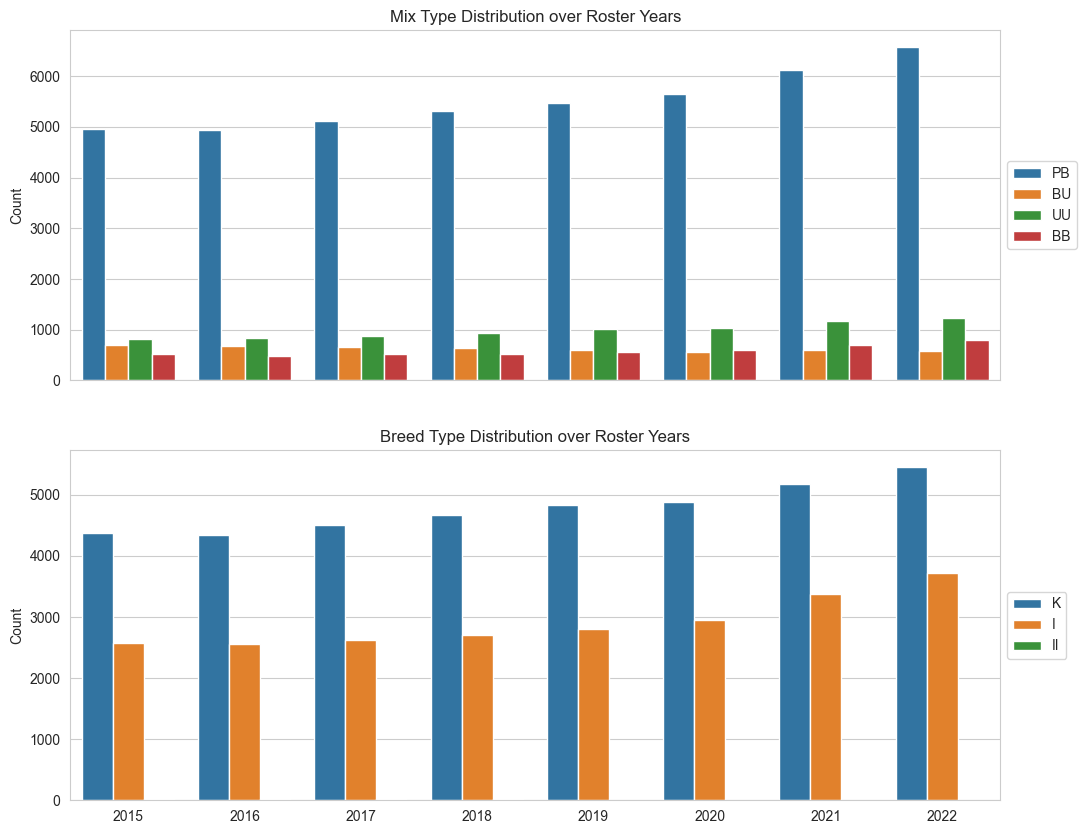

In [37]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Plot for Mix Type over Roster Years
sns.countplot(x="roster", hue="mixed_type", data=filtered_dog_data, ax=axes[0])
axes[0].set_title("Mix Type Distribution over Roster Years")
axes[0].set_xlabel("")
axes[0].set_ylabel("Count")
axes[0].legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Plot for Breed Type over Roster Years
sns.countplot(x="roster", hue="breed_type", data=filtered_dog_data, ax=axes[1])
axes[1].set_title("Breed Type Distribution over Roster Years")
axes[1].set_xlabel("")
axes[1].set_ylabel("Count")
axes[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
# Display the plots
plt.show()

Here we see that there is a strong upward tick in the number of dog owners for 30 and 40 year-old. Up until 2019 it was the 50 year olds that had the highest number of dog owners This is a trend that we will explore further in this analysis.

In [38]:
highlighted_age_groups = [30, 40]
dog_owner_grouped_count = filtered_dog_data.groupby(["roster", "age_group_10"])[
    "owner_id"
].nunique()
dog_owner_grouped_count

plot = get_line_plots(
    dog_owner_grouped_count.reset_index(),
    "roster",
    "age_group_10",
    highlighted_age_groups,
)
plot.opts(
    title="30- and 40-year-old Owners Contribute to increase in Dog Ownership",
    ylabel="Count",
    height=500,
    width=800,
)

:Overlay
   .NdOverlay.I     :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.II    :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.III   :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.IV    :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.V     :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.VI    :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.VII   :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.VIII  :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.IX    :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.X     :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.XI    :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.XII   :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.XIII  :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.XIV   :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.XV    :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.XVI   :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.XVII  :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.XVIII :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)
   .NdOverlay.XIX   :NdOverlay   [age_group_10]
      :Curve   [roster]   (owner_id)
   .NdOverlay.XX    :NdOverlay   [age_group_10]
      :Scatter   [roster]   (owner_id)

This is a simple wordcloud taken from a Print description of the district. When you click on the district as well as the word cloud comes up in the shape of the district. The description that the word cloud is formed from is also shown in a pane.

In [195]:
districts_poly.data["geometry"].to_crs(ccrs.GOOGLE_MERCATOR).bounds

,minx,miny,maxx,maxy
0,949468.112118,6.001561e+06,951876.626454,6.004810e+06
1,946283.967787,5.994499e+06,952213.932259,6.002599e+06
2,944370.834469,5.997150e+06,949354.431619,6.004488e+06
3,945950.705451,6.002489e+06,950493.035835,6.006192e+06
4,946034.318823,6.004193e+06,950560.072076,6.006780e+06
5,949111.759304,6.003835e+06,953893.646405,6.009208e+06
6,951632.963685,5.999507e+06,960181.018422,6.006249e+06
7,950897.168912,5.997890e+06,955821.096923,6.002024e+06
8,940429.086452,6.000709e+06,946865.168384,6.008251e+06
9,942655.440222,6.005373e+06,950251.442940,6.011394e+06


In [202]:
# create a stream which selects a district from the map
select_district = streams.Selection1D(source=districts_poly)


def display_info(index):
    """Displays a brief description of the selected district"""
    if not index:
        return pn.pane.Markdown("No district selected on Here")
    else:
        selected_district = (
            districts_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        return pn.pane.Markdown(
            f"""
            <div style="
            border: 2px solid #4a4a4a;
            border-radius: 10px;
            padding: 20px 20px 20px 20px;
            background-color: #f9f9f9;
            box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
            word-wrap: break-word;
            ">
            <h2 style='color: #008080;'>{dnum}</h2>
            <h1 style='color: #000080;'>{dname}</h1>
            <h3 style='color: #708090;'>{ddesc}</h3>
            </div>
            """,
            width=500,
        )


def display_wordcloud(index):
    """Displays a wordcloud of the selected district based on the description
    of the district in the shape of the district polygon"""
    if len(index) == 0:
        text = "district select on map"
        wordcloud = WordCloud(width=800, height=500, background_color="white").generate(
            text
        )
        return hv.RGB(np.array(wordcloud))
    else:
        selected_district = (
            districts_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        text = f"{dnum} {dname} {ddesc}"

        polygon = districts_poly.iloc[index[0]].data["geometry"].iloc[0]

        # Get the bounding box of the polygon
        minx, miny, maxx, maxy = polygon.bounds

        # Calculate the width and height of the bounding box
        margin = 0.1
        width = (maxx - minx) * (1 + margin)
        height = (maxy - miny) * (1 + margin)
        # Calculate the new minimum x and y coordinates
        minx -= width * margin / 2
        miny -= height * margin / 2

        # Create a new image with the same aspect ratio as the bounding box
        image_width = 800
        image_height = int(image_width * height / width)
        test = Image.new("1", (image_width, image_height), 0)

        # Convert the coordinates to a numpy array
        coords = np.array(list(polygon.exterior.coords))
        coords -= [minx, miny]
        coords *= [image_width / width, image_height / height]
        coords[:, 1] = image_height - coords[:, 1]
        # Convert the coordinates back to a list of tuples
        scaled_coords = list(map(tuple, coords))

        # Draw the scaled polygon onto the image
        ImageDraw.Draw(test).polygon(scaled_coords, outline=1, fill=1)

        wordcloud = WordCloud(
            mask=~np.array(test) * 255,
            # color_func=lambda *args, **kwargs: breed_color,
            include_numbers=True,
            margin=20,
            # contour_color=breed_color,
            contour_width=5,
            width=800,
            height=500,
            background_color="white",
        ).generate(text)
        return hv.RGB(np.array(wordcloud)).opts(
            width=800,
            height=500,
            tools=["box_zoom"],
            active_tools=["box_zoom"],
            xaxis=None,
            yaxis=None,
            # toolbar=None,
        )


district_layout = pn.Column(
    pn.bind(display_wordcloud, select_district.param.index),
    pn.Row(
        districts_poly * neighborhood_poly,
        pn.bind(display_info, select_district.param.index),
    ),
    sizing_mode="stretch_width",
)

district_layout_card = pn.Card(
    district_layout,
    title="District Descript",
    sizing_mode="stretch_width",
)

In [203]:
pn.state.kill_all_servers()
district_layout_card.show()

Launching server at http://localhost:65298


Popular Breeds


In [41]:
# the top n small breeds in Zurich
ktopn = (
    filtered_dog_data.loc[filtered_dog_data["breed_type"] == "K"]["standard"]
    .value_counts()
    .head(15)
    .index.tolist()
)
ktopn_pure = (
    filtered_dog_data.loc[
        (filtered_dog_data["breed_type"] == "K") & (
            filtered_dog_data["is_pure_breed"])
    ]
    .standard.value_counts()
    .head(15)
    .index.tolist()
)

# The top n big breeds in Zurich
itopn = (
    filtered_dog_data[filtered_dog_data["breed_type"] == "I"]["standard"]
    .value_counts()
    .head(15)
    .index.tolist()
)
itopn_pure = (
    filtered_dog_data.loc[
        (filtered_dog_data["breed_type"] == "I") & (
            filtered_dog_data["is_pure_breed"])
    ]
    .standard.value_counts()
    .head(15)
    .index.tolist()
)

topn = ktopn + itopn
topn_pure = ktopn_pure + itopn_pure

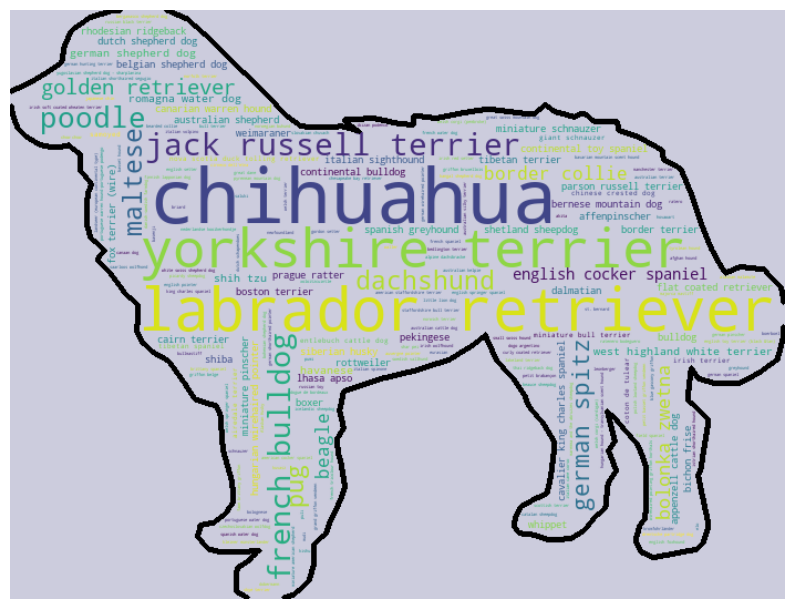

In [42]:
mask_path = "../images/wordcloud_mask.jpg"
dog_image_mask = np.array(Image.open(mask_path))
# Threshold to remove the gray watermark
threshold = 150
dog_image_mask[dog_image_mask < threshold] = 0
dog_image_mask[dog_image_mask >= threshold] = 255

# Create a count of the various pure breeds
pure_breed_count = filtered_dog_data.loc[
    (filtered_dog_data["is_pure_breed"])
].standard.value_counts()
# Create a word cloud for the pure breeds
wordcloud = WordCloud(
    contour_width=5,
    background_color="#ccd",
    mask=dog_image_mask,
).generate_from_frequencies(pure_breed_count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Zurich Population Dataset
Number of economic resident population by statistical urban district, origin, sex, age year, 5-year age groups and year, since 1993.



In [43]:
# zurich_pop_link = "https://data.stadt-zuerich.ch/dataset/bev_bestand_jahr_quartier_alter_herkunft_geschlecht_od3903/download/BEV390OD3903.csv"
zurich_pop_link = "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_pop.csv"
zurich_pop_data = pd.read_csv(zurich_pop_link)
zurich_pop_data = hf.sanitize_df_column_names(zurich_pop_data)
zurich_pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370658 entries, 0 to 370657
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   deadline_date_year  370658 non-null  int64 
 1   age_v_sort          370658 non-null  int64 
 2   age_v_cd            370658 non-null  int64 
 3   age_v_short         370658 non-null  int64 
 4   age_v_05_sort       370658 non-null  int64 
 5   age_v_05_cd         370658 non-null  int64 
 6   age_v_05_short      370658 non-null  object
 7   age_v_10_cd         370658 non-null  int64 
 8   age_v_10_short      370658 non-null  object
 9   age_v_20_cd         370658 non-null  int64 
 10  age_v_20_short      370658 non-null  object
 11  sex_cd              370658 non-null  int64 
 12  sex_long            370658 non-null  object
 13  sex_short           370658 non-null  object
 14  circle_cd           370658 non-null  int64 
 15  circle_lang         370658 non-null  object
 16  qu

In [44]:
zurich_pop_data.sample().T

,288714
deadline_date_year,2016
age_v_sort,47
age_v_cd,47
age_v_short,47
age_v_05_sort,10
age_v_05_cd,45
age_v_05_short,45-49
age_v_10_cd,40
age_v_10_short,40-49
age_v_20_cd,40


In [45]:
# Create 'is_swiss' column, True if 'origin_lang' contains 'Schweizer'
zurich_pop_data["is_swiss"] = zurich_pop_data["origin_lang"].str.contains(
    "Schweizer", regex=False, na=False, case=False
)

# Create new columns with copied data for further processing
zurich_pop_data["neighborhood"] = zurich_pop_data["quar_lang"].copy()
zurich_pop_data["district"] = zurich_pop_data["circle_cd"].copy().astype(int)

# Create 'sub_district' column, ensuring it's a string with leading zeros
zurich_pop_data["sub_district"] = (
    zurich_pop_data["quar_cd"].copy().astype(str).str.zfill(3)
)

# Create new columns with copied data for further processing
zurich_pop_data["roster"] = zurich_pop_data["deadline_date_year"].copy()
zurich_pop_data["age_group_10"] = zurich_pop_data["age_v_10_cd"].copy()
zurich_pop_data["age"] = zurich_pop_data["age_v_cd"].copy()

# Create 'is_male' column, True if 'sex_cd' equals 1
zurich_pop_data["is_male"] = zurich_pop_data["sex_cd"] == 1

# Create 'pop_count' column with copied data from 'number_we'
zurich_pop_data["pop_count"] = zurich_pop_data["number_we"].copy()

# Define a list of columns of interest for the final dataframe
columns_of_interest_pop = [
    "is_swiss",
    "neighborhood",
    "district",
    "sub_district",
    "roster",
    "age_group_10",
    "age",
    "is_male",
    "pop_count",
]

# Create a new dataframe 'pop_data' with only the columns of interest
pop_data = zurich_pop_data[columns_of_interest_pop].copy()

# Display the structure of 'pop_data' dataframe for verification
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370658 entries, 0 to 370657
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_swiss      370658 non-null  bool  
 1   neighborhood  370658 non-null  object
 2   district      370658 non-null  int32 
 3   sub_district  370658 non-null  object
 4   roster        370658 non-null  int64 
 5   age_group_10  370658 non-null  int64 
 6   age           370658 non-null  int64 
 7   is_male       370658 non-null  bool  
 8   pop_count     370658 non-null  int64 
dtypes: bool(2), int32(1), int64(4), object(2)
memory usage: 19.1+ MB


We need to ensure That there were datasets have some of the same column and column names so that they could be merged together and matched well. Since we only have data from the year 2015 with adults data set we will only look at data from the year 2015 with the population data set. And to match the age range that we have in the dogs data set we will also take the ages in the 10 year range here in addition to that the ado is also given on at the neighborhood level so that can be easily matched as well.


In [149]:
pop_data.sample(10)

,is_swiss,neighborhood,district,sub_district,roster,age_group_10,age,is_male,pop_count
10328,False,Hottingen,7,072,1993,70,78,True,1
368745,False,Hirslanden,7,073,2022,80,80,False,3
265269,True,Mühlebach,8,082,2014,50,58,False,29
294992,False,Rathaus,1,011,2017,0,0,True,4
222536,False,Leimbach,2,023,2011,10,18,True,4
192070,False,Oberstrass,6,063,2008,60,67,False,9
259076,False,Langstrasse,4,042,2014,10,12,False,6
3157,True,Lindenhof,1,013,1993,20,24,False,3
218102,True,City,1,014,2010,70,78,False,1
309698,True,Friesenberg,3,033,2018,10,16,True,79


Let's look at some descriptive statistics on the data first.Here we see that the data is pretty clean already there are only 30 four neighborhoods and sub districts there are 12 districts come on the Rasta who is from 1993 to 2022 however we would only use from 2015. We will aggregate the data for the ages so that it matches the range that we had in the dog data set so that our direct comparison can be made.

In [47]:
# Description of the data
pop_data.describe(include="all").T.sort_values(by="unique").fillna("")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_swiss,370658.0,2,True,199628,,,,,,,
is_male,370658.0,2,False,188476,,,,,,,
neighborhood,370658.0,34,Sihlfeld,11605,,,,,,,
sub_district,370658.0,34,034,11605,,,,,,,
district,370658.0,,,,6.382215,3.532491,1.0,3.0,7.0,9.0,12.0
roster,370658.0,,,,2007.617618,8.661926,1993.0,2000.0,2008.0,2015.0,2022.0
age_group_10,370658.0,,,,42.102963,27.348304,0.0,20.0,40.0,60.0,100.0
age,370658.0,,,,46.516676,27.357132,0.0,23.0,46.0,69.0,111.0
pop_count,370658.0,,,,31.333286,32.840995,0.0,7.0,21.0,44.0,255.0


In [48]:
pop_data.loc[pop_data["roster"] >= 2015]
post_2015_pop_data = pop_data.loc[pop_data["roster"] >= 2015].copy()

# group by age group , roster, subdistrict, is_male and sum the population count
pop_gender_agg = (
    post_2015_pop_data.groupby(
        ["roster", "sub_district", "is_male", "age_group_10", "neighborhood"]
    )["pop_count"]
    .sum()
    .reset_index()
)
# quick sanity check to see if the sum is what we believe the population of Zurich is
pop_gender_agg.groupby("roster")["pop_count"].sum()

roster
2015    410404
2016    415682
2017    423310
2018    428737
2019    434008
2020    434736
2021    436332
2022    443037
Name: pop_count, dtype: int64

In [49]:
# Get the unique age groups from the dog data
dog_age_groups = filtered_dog_data.age_group_10.unique()

# Filter the population data to only include these age groups
pop_data_filtered = pop_gender_agg[pop_gender_agg.age_group_10.isin(
    dog_age_groups)]
pop_data_filtered.sample(5)

,roster,sub_district,is_male,age_group_10,neighborhood,pop_count
5103,2022,013,True,60,Lindenhof,51
1308,2016,102,True,60,Wipkingen,575
1579,2017,024,True,20,Enge,630
5481,2022,074,True,70,Witikon,450
2970,2019,021,False,60,Wollishofen,849


In [50]:
# Do a aggregation of the pop data on the roster level and on the is_male level and sum the population count
pop_gender_agg = (
    pop_data_filtered.groupby(["roster", "is_male"])[
        "pop_count"].sum().unstack()
)

# Normalize the population count to calculate the percentage portion
pop_data_agg_normalized = pop_gender_agg.div(
    pop_gender_agg.sum(axis=1), axis=0)

pop_data_agg_normalized.round(3)

is_male,False,True
roster,,
2015,0.504,0.496
2016,0.503,0.497
2017,0.502,0.498
2018,0.501,0.499
2019,0.501,0.499
2020,0.501,0.499
2021,0.500,0.500
2022,0.499,0.501


We see that they're just about equal amounts of men and women male and female persons in Zurich this is interesting because the dog owners ratio but significantly higher for females than for males.

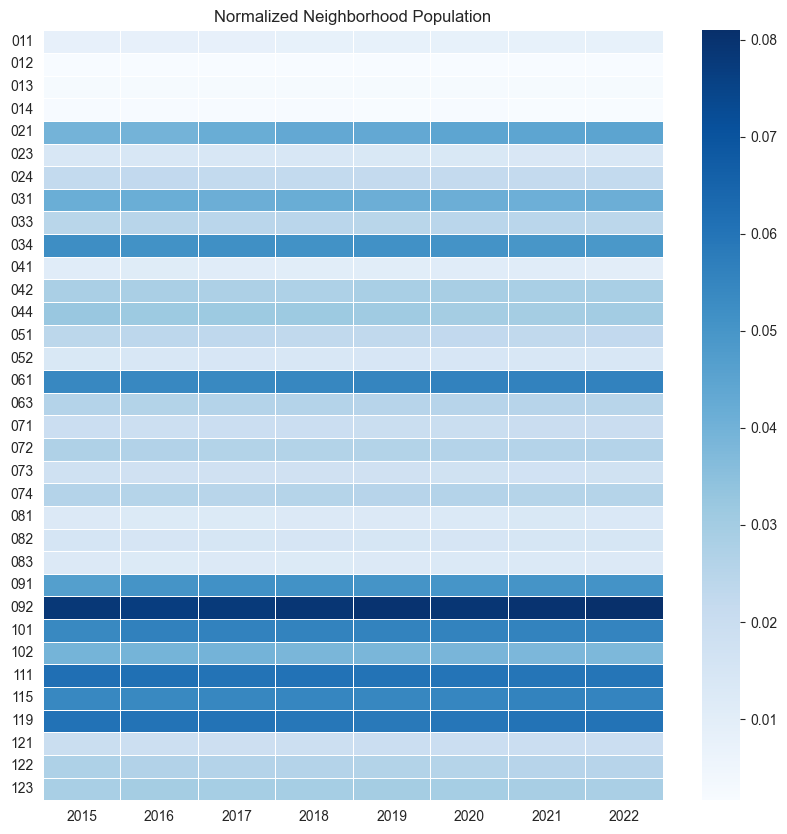

In [51]:
# Do a sum per roster and per neighborhood and display graphically
pop_by_neighborhood = (
    pop_data_filtered.groupby(["roster", "sub_district"])[
        "pop_count"].sum().unstack()
)
pop_data_sub_district_normalized = pop_by_neighborhood.div(
    pop_by_neighborhood.sum(axis=1), axis=0
)
plt.figure(figsize=(10, 10))
# Create the heatmap
pop_heatmap = sns.heatmap(
    pop_data_sub_district_normalized.T,
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor="white",
).set(xlabel="", ylabel="")

# Rotate the x-axis labels
plt.xticks(rotation=0)
# Rotate the y-axis labels
plt.yticks(rotation=0)
plt.title("Normalized Neighborhood Population")

plt.show()

The heat map shows that the proportion of the population within each of the neighborhoods in Zurich stayed approximately the same throughout the years from 2015 to 2022.

In [52]:
# pop_data_filtered
@pn.depends(roster_slider.param.value)
def get_pop_neighborhood_count(roster):
    df = pop_data_filtered.query(f"roster=={roster}")
    df = df.groupby("neighborhood")["pop_count"].sum()
    map_gdf = neighborhood_gdf.set_index("neighborhood")
    agg_gdf = map_gdf.merge(df, left_index=True, right_index=True, how="left")
    return gv.Polygons(agg_gdf).opts(
        **poly_opts,
        color="pop_count",
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        title=f"Pop Count {roster}",
        aspect="equal",
        color_levels=6,
    )


@pn.depends(roster_slider.param.value)
def get_pop_density(roster):
    df = pop_data_filtered.query(f"roster=={roster}")
    df = df.groupby("neighborhood")["pop_count"].sum()
    map_gdf = merged_gdf.set_index("neighborhood")
    agg_gdf = map_gdf.merge(df, left_index=True, right_index=True, how="left")
    agg_gdf["pop_density"] = agg_gdf["pop_count"] / agg_gdf["area_km2"]
    return gv.Polygons(agg_gdf).opts(
        **poly_opts,
        color="pop_density",
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        title=f"Pop Density {roster}",
        aspect="equal",
        color_levels=6,
    )


pop_count_pane = pn.pane.HoloViews(get_pop_neighborhood_count)
pop_density_pane = pn.pane.HoloViews(get_pop_density)

# pn.Column(roster_slider, pn.Row(pop_count_pane, pop_density_pane))

In [53]:
# Place the Dog density and population density plots on same page for comparison
pn.Column(
    roster_slider,
    pn.Row(neighborhood_dog_count_pane, dog_density_pane),
    pn.Row(pop_count_pane, pop_density_pane),
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'a3ec8514-416d-46ed-8e82-dcf1bdd98cf6': {'version…

#### Comparing the Population and Dog Owner population

With the population data aggregated for every 10 year interval similarly to the dog owners data set we can compare these two datasets to see if any correlation exists between the two (count or density). We can also measure to see if there's any correlation or similarities in the proportions based on the age or the gender of the dog owners and the population or how this has changed year over year

In [54]:
(
    filtered_dog_data.groupby(
        ["roster", "is_male_owner"],
    )["owner_id"]
    .nunique()
    .unstack()
)

is_male_owner,False,True
roster,,
2015,4275,2035
2016,4262,2008
2017,4413,2032
2018,4581,2093
2019,4745,2180
2020,4882,2260
2021,5379,2483
2022,5825,2639


In [55]:
# Compare the gender of the dog Owners for each year
dog_owner_gender_agg = (
    filtered_dog_data.groupby(
        ["roster", "is_male_owner"],
    )["owner_id"]
    .nunique()
    .unstack()
)
# normalize the count by the total dog_owner count per roster
dog_owner_gender_agg_normalized = dog_owner_gender_agg.div(
    dog_owner_gender_agg.sum(axis=1), axis=0
)
# dog_owner_agg_normalized

# Do a aggregated count by subdistrict/neighborhood and roster
filtered_dog_data["sub_district"] = (
    filtered_dog_data["sub_district"].astype(int).astype("string").str.zfill(3)
)
dog_owner_subdistrict = (
    filtered_dog_data.groupby(
        [
            "roster",
            "sub_district",
        ]
    )["owner_id"]
    .nunique()
    .unstack()
)
# Normalized the count by the total count per roster
dog_owner_subdistrict_normalized = dog_owner_subdistrict.div(
    dog_owner_subdistrict.sum(axis=1), axis=0
)
dog_owner_subdistrict_normalized

sub_district,011,012,013,014,021,023,024,031,033,034,041,042,044,051,052,061,063,071,072,073,074,081,082,083,091,092,101,102,111,115,119,121,122,123
roster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,0.009350,0.001109,0.004120,0.002219,0.044057,0.018067,0.025990,0.038986,0.022821,0.032647,0.008241,0.025674,0.021395,0.014422,0.015055,0.036450,0.031537,0.034865,0.033597,0.022187,0.048019,0.016640,0.017433,0.019334,0.041046,0.078130,0.070206,0.030745,0.057369,0.050713,0.058320,0.015531,0.031220,0.022504
2016,0.008772,0.001116,0.004466,0.002392,0.044976,0.017703,0.026156,0.039234,0.023285,0.030941,0.008134,0.026316,0.021053,0.014833,0.016427,0.039075,0.031898,0.033333,0.034450,0.022807,0.048166,0.017065,0.018182,0.018182,0.041308,0.076396,0.069219,0.029027,0.057576,0.051356,0.057097,0.015311,0.030781,0.022967
2017,0.009310,0.001086,0.004189,0.002638,0.043910,0.016912,0.029015,0.035997,0.022653,0.031032,0.007603,0.026532,0.020326,0.015981,0.017843,0.039410,0.032583,0.032273,0.035687,0.021257,0.047944,0.017067,0.017998,0.018309,0.045306,0.073080,0.068580,0.026998,0.060667,0.047789,0.058960,0.015361,0.030256,0.025446
2018,0.010189,0.001349,0.003746,0.001948,0.046299,0.015883,0.028768,0.038508,0.021426,0.031166,0.007042,0.026671,0.020078,0.013036,0.019179,0.038358,0.030267,0.033413,0.034912,0.020977,0.046898,0.016931,0.018729,0.018580,0.048846,0.075217,0.068924,0.026521,0.059185,0.049745,0.058885,0.015133,0.029967,0.023224
2019,0.010253,0.001300,0.003321,0.001444,0.049819,0.016462,0.027148,0.037112,0.021516,0.032491,0.008520,0.023105,0.020361,0.012130,0.020505,0.038845,0.028592,0.032347,0.037256,0.021949,0.045921,0.017473,0.017473,0.018195,0.047653,0.078989,0.069025,0.024838,0.058484,0.050397,0.059350,0.015451,0.029892,0.022383
2020,0.008961,0.001260,0.003220,0.002240,0.048866,0.016942,0.028843,0.037945,0.021983,0.032204,0.007981,0.025343,0.020442,0.011761,0.021703,0.039345,0.028283,0.032764,0.036264,0.021703,0.045926,0.016522,0.019182,0.016662,0.046486,0.076869,0.066928,0.025203,0.057687,0.050126,0.060487,0.015542,0.030524,0.023803
2021,0.009667,0.000890,0.002925,0.001908,0.053040,0.015518,0.029763,0.038794,0.020224,0.032689,0.009031,0.026329,0.018316,0.012465,0.022386,0.041847,0.029636,0.032943,0.035742,0.020351,0.045535,0.016535,0.020987,0.017426,0.046807,0.074917,0.064487,0.025312,0.054057,0.049479,0.059272,0.015009,0.030654,0.025057
2022,0.009570,0.001063,0.002836,0.001181,0.052812,0.016541,0.030600,0.037216,0.020440,0.032491,0.008861,0.026465,0.017958,0.013705,0.022212,0.042651,0.029182,0.032727,0.036980,0.021739,0.044660,0.016777,0.019967,0.016541,0.048795,0.076205,0.063091,0.027292,0.053284,0.051749,0.056829,0.014414,0.028355,0.024811


In [56]:
print(f"Dog Owner Count by Sub District")
display(dog_owner_subdistrict)
print(f"Population Count by Sub District")
display(pop_by_neighborhood)

Dog Owner Count by Sub District


sub_district,011,012,013,014,021,023,024,031,033,034,041,042,044,051,052,061,063,071,072,073,074,081,082,083,091,092,101,102,111,115,119,121,122,123
roster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,59,7,26,14,278,114,164,246,144,206,52,162,135,91,95,230,199,220,212,140,303,105,110,122,259,493,443,194,362,320,368,98,197,142
2016,55,7,28,15,282,111,164,246,146,194,51,165,132,93,103,245,200,209,216,143,302,107,114,114,259,479,434,182,361,322,358,96,193,144
2017,60,7,27,17,283,109,187,232,146,200,49,171,131,103,115,254,210,208,230,137,309,110,116,118,292,471,442,174,391,308,380,99,195,164
2018,68,9,25,13,309,106,192,257,143,208,47,178,134,87,128,256,202,223,233,140,313,113,125,124,326,502,460,177,395,332,393,101,200,155
2019,71,9,23,10,345,114,188,257,149,225,59,160,141,84,142,269,198,224,258,152,318,121,121,126,330,547,478,172,405,349,411,107,207,155
2020,64,9,23,16,349,121,206,271,157,230,57,181,146,84,155,281,202,234,259,155,328,118,137,119,332,549,478,180,412,358,432,111,218,170
2021,76,7,23,15,417,122,234,305,159,257,71,207,144,98,176,329,233,259,281,160,358,130,165,137,368,589,507,199,425,389,466,118,241,197
2022,81,9,24,10,447,140,259,315,173,275,75,224,152,116,188,361,247,277,313,184,378,142,169,140,413,645,534,231,451,438,481,122,240,210


Population Count by Sub District


sub_district,011,012,013,014,021,023,024,031,033,034,041,042,044,051,052,061,063,071,072,073,074,081,082,083,091,092,101,102,111,115,119,121,122,123
roster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,3047,612,933,752,14735,5263,8280,15426,9210,19376,4030,10608,12051,8900,5037,20098,9683,7182,10039,6698,9580,4636,5665,4706,17329,29038,20006,14561,22855,20104,22461,7376,10260,10656
2016,3082,613,926,754,14907,5308,8450,15574,9434,19220,4145,10621,11888,8900,5357,20313,9806,7223,10030,6653,9616,4675,5655,4637,18931,28790,21089,14745,22960,20253,22606,7154,10028,11142
2017,3124,648,909,753,15924,5365,8495,15732,9295,19666,4151,10632,12037,8885,5550,20502,9901,7393,10078,6768,9547,4734,5706,4838,19586,29704,21385,15061,23041,20827,23064,7208,9964,11251
2018,3113,638,945,766,16736,5446,8593,16173,9398,19720,4042,10591,12150,8846,5519,20980,10003,7564,10167,6838,9865,4840,5813,4790,19687,30540,21549,14801,23376,21160,22814,7367,10068,11366
2019,3141,651,967,740,16924,5337,8606,16147,9611,20073,4061,11292,12090,8955,5608,21501,9936,7697,10284,6860,9965,4918,5821,4961,19685,31210,21814,14947,23555,21263,23013,7663,10237,11638
2020,3164,652,966,767,17391,5330,8598,16056,9594,19918,4172,11371,11614,8816,5616,21932,9893,7766,10220,6753,10122,5062,5886,5079,19672,30955,21858,15084,23462,21502,23242,7665,10083,11493
2021,3135,678,979,759,17482,5514,8679,16008,9624,19576,4193,11283,11648,8966,5605,21979,9952,7857,10205,6706,10131,5314,5875,5096,19798,31479,21903,14984,23500,21882,23710,7644,9978,11387
2022,3198,651,996,762,17996,5632,8928,16425,9623,19763,4126,11480,12151,9043,5630,22450,10023,8043,10361,6915,10275,5286,5930,5104,20281,32423,22198,15162,23913,22176,24206,7734,10189,11439


In [57]:
# Check the percentage change from the previous year
dog_owner_subdistrict.pct_change(axis=0).fillna(0)

# merge the dog owner count and the population count on the roster and subdistrict
dog_pop_comb_dataset = (
    # dog_data.query("roster < 2023")
    filtered_dog_data.groupby(["roster", "neighborhood", "sub_district"])[
        ["owner_id"]]
    .nunique()
    .merge(
        pop_data_filtered.groupby(["roster", "neighborhood", "sub_district"])[
            ["pop_count"]
        ].sum(),
        left_index=True,
        right_index=True,
    )
)
dog_pop_comb_dataset = dog_pop_comb_dataset.rename(
    columns={"owner_id": "owner_count"})

dog_pop_comb_dataset["dog_owner_pop_ratio"] = (
    dog_pop_comb_dataset["owner_count"] / dog_pop_comb_dataset["pop_count"]
)

dog_pop_comb_dataset["dog_owner_pop_ratio_pct_change"] = (
    dog_pop_comb_dataset.groupby(["neighborhood", "sub_district"])[
        "dog_owner_pop_ratio"
    ]
    .pct_change(axis=0)
    .fillna(0)
)
dog_pop_comb_dataset.sample(5)

,,,owner_count,pop_count,dog_owner_pop_ratio,dog_owner_pop_ratio_pct_change
roster,neighborhood,sub_district,,,,
2017,Lindenhof,013,27,909,0.029703,-0.017680
2022,Oerlikon,115,438,22176,0.019751,0.111036
2017,Weinegg,083,118,4838,0.024390,-0.007916
2018,Hirslanden,073,140,6838,0.020474,0.011437
2019,Enge,024,188,8606,0.021845,-0.022312


In [58]:
dog_pop_comb_dataset["dog_owner_pop_ratio"].reset_index()

,roster,neighborhood,sub_district,dog_owner_pop_ratio
0,2015,Affoltern,111,0.015839
1,2015,Albisrieden,091,0.014946
2,2015,Alt-Wiedikon,031,0.015947
3,2015,Altstetten,092,0.016978
4,2015,City,014,0.018617
...,...,...,...,...
267,2022,Weinegg,083,0.027429
268,2022,Werd,041,0.018177
269,2022,Wipkingen,102,0.015235
270,2022,Witikon,074,0.036788


In [59]:
dog_pop_comb_dataset.describe().T

hv.HeatMap(
    dog_pop_comb_dataset["dog_owner_pop_ratio"]
    .reset_index()
    .sort_values(by="sub_district", ascending=False),
    kdims=[
        "roster",
        "sub_district",
    ],
    vdims=["dog_owner_pop_ratio", "neighborhood"],
).opts(
    height=800,
    width=500,
    title="Dog Owner to Population Ratio",
    tools=["hover"],
    colorbar=True,
    color_levels=4,
    hooks=[update_xaxis],
    active_tools=["box_zoom"],
)

:HeatMap   [roster,sub_district]   (dog_owner_pop_ratio,neighborhood)

In [60]:
highlighted_sub_districts = ["074", "071", "052", "072"]
get_line_plots(
    dog_pop_comb_dataset["dog_owner_pop_ratio"].reset_index(),
    x="roster",
    group_by="sub_district",
    highlight_list=highlighted_sub_districts,
).opts(
    height=400,
    width=600,
    legend_cols=2,
    title="Dog Owner to Population Ratio by Sub District",
    hooks=[update_xaxis],
)

:Overlay
   .NdOverlay.I       :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.II      :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.III     :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.IV      :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.V       :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.VI      :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.VII     :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.VIII    :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.IX      :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.X       :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XI      :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XII     :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XIII    :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XIV     :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XV      :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XVI     :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XVII    :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XVIII   :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XIX     :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XX      :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXI     :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXII    :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXIII   :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXIV    :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXV     :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXVI    :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXVII   :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXVIII  :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXIX    :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXX     :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXI    :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXII   :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXIII  :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXIV   :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXV    :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXVI   :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXVII  :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXVIII :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XXXIX   :NdOverlay   [sub_district]
      :Curve   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XL      :NdOverlay   [sub_district]
      :Scatter   [roster]   (dog_owner_pop_ratio)
   .NdOverlay.XLI     :NdOverla

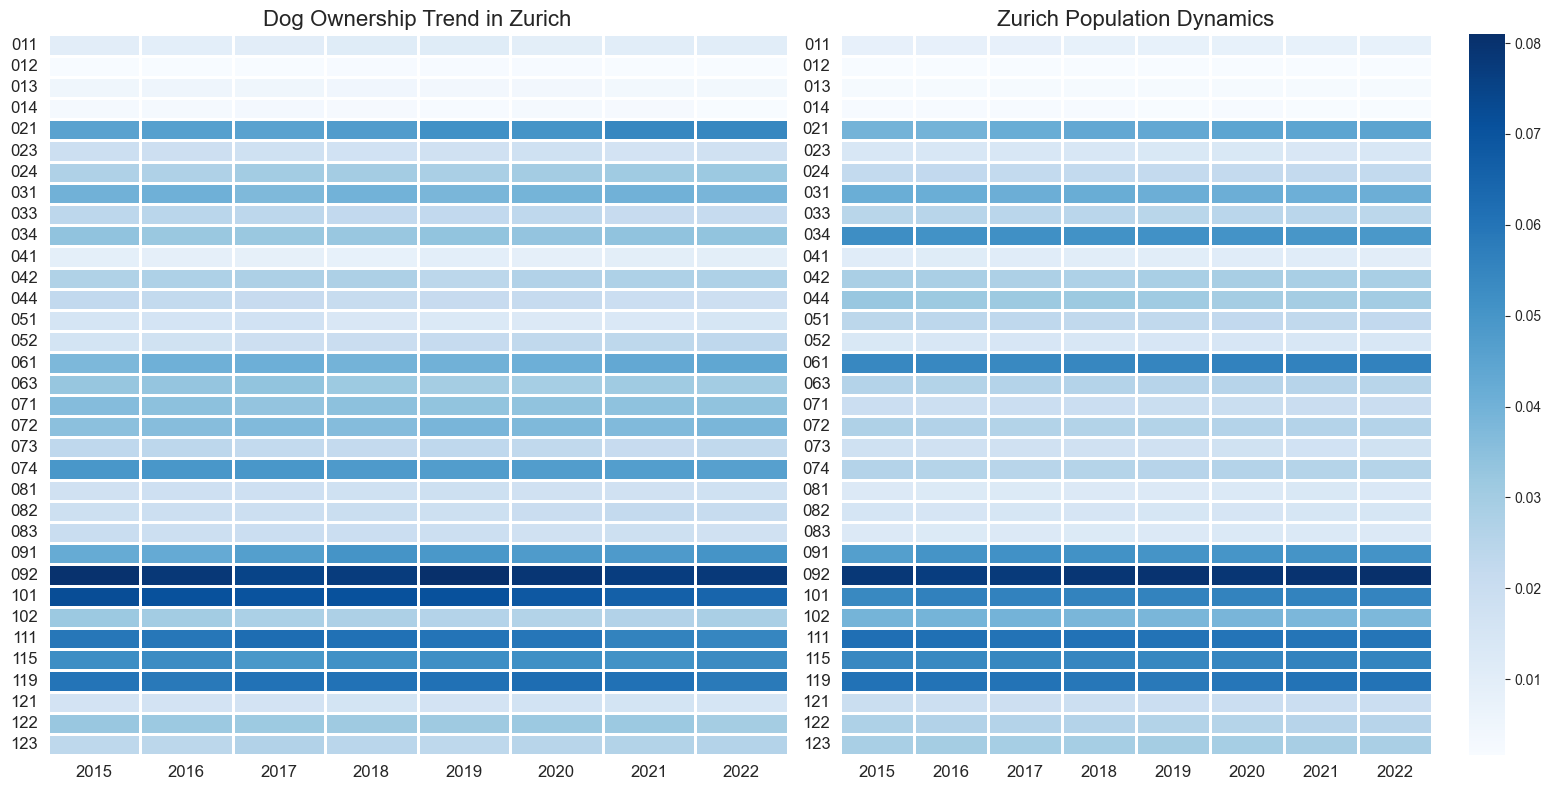

In [61]:
# Create a figure with two subplots and adjust the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Create the first heatmap for dog ownership
sns.heatmap(
    dog_owner_subdistrict_normalized.T,
    cmap="Blues",
    cbar=False,
    linewidths=2,
    linecolor="white",
    ax=ax1,  # Specify the first subplot as the target
)
ax1.set_title("Dog Ownership Trend in Zurich")
ax1.set(xlabel="", ylabel="")
ax1.title.set_size(16)
ax1.tick_params(axis="both", which="major", labelsize=12)

# Create the second heatmap for population dynamics
sns.heatmap(
    pop_data_sub_district_normalized.T,
    cmap="Blues",
    cbar=True,  # Enable the color bar for the second heatmap
    linewidths=2,
    linecolor="white",
    ax=ax2,  # Specify the second subplot as the target
)
ax2.set_title("Zurich Population Dynamics")
ax2.set(xlabel="", ylabel="")
ax2.title.set_size(16)
ax2.tick_params(axis="both", which="major", labelsize=12)

# Improve the layout
plt.tight_layout()

# Display the plot
plt.show()

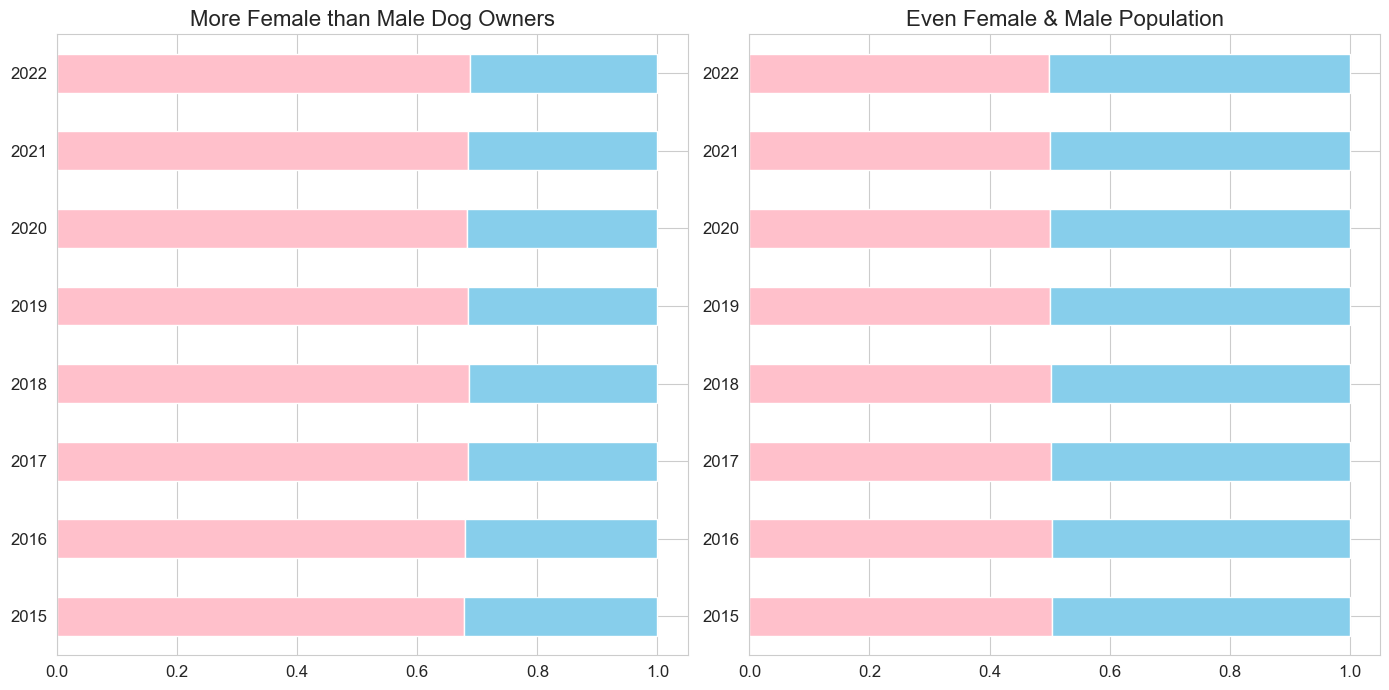

In [62]:
custom_palette = sns.color_palette(["pink", "skyblue"])


# Create a figure with two subplots and adjust the figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot the first bar plot for dog owners
dog_owner_gender_agg_normalized.plot.barh(
    stacked=True,
    title="More Female than Male Dog Owners",
    ax=ax1,
    color=custom_palette,
    legend=False,
)
ax1.set(xlabel="", ylabel="")
ax1.title.set_size(16)  # Increase title font size
# Increase tick label size
ax1.tick_params(axis="both", which="major", labelsize=12)

# Plot the second bar plot for population
pop_data_agg_normalized.plot.barh(
    stacked=True,
    title="Even Female & Male Population",
    ax=ax2,
    color=custom_palette,
    legend=False,
)
ax2.set(xlabel="", ylabel="")
ax2.title.set_size(16)
ax2.tick_params(axis="both", which="major", labelsize=12)

# Improve the layout
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
pop_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4895 entries, 1 to 5760
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   roster        4895 non-null   int64 
 1   sub_district  4895 non-null   object
 2   is_male       4895 non-null   bool  
 3   age_group_10  4895 non-null   int64 
 4   neighborhood  4895 non-null   object
 5   pop_count     4895 non-null   int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 234.2+ KB


In [64]:
# Group the population count by roster, sub_district, is_male, and age_group_10
pop_count_grouped_4_cols = (
    pop_data_filtered.groupby(["roster", "sub_district", "is_male", "age_group_10"])[
        "pop_count"
    ]
    .sum()
    .reset_index()
)

# Display the grouped population count
pop_count_grouped_4_cols.head()

,roster,sub_district,is_male,age_group_10,pop_count
0,2015,011,False,10,58
1,2015,011,False,20,310
2,2015,011,False,30,304
3,2015,011,False,40,196
4,2015,011,False,50,186


In [65]:
filtered_dog_data

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,neighborhood,roster,pet_count,mixed_type,is_pure_breed,breed_type,dog_color_en,breed_2_en,standard,age_group_10_missing
0,000126,True,False,60,3.0,9.0,092,Altstetten,2015,1,PB,True,K,black/brown,no,welsh terrier,0
1,084431,False,False,70,10.0,7.0,071,Fluntern,2015,1,PB,True,K,black/tan,no,welsh terrier,0
2,088455,False,True,40,15.0,7.0,074,Witikon,2015,1,PB,True,K,black red,no,welsh terrier,0
3,101835,False,True,40,4.0,8.0,082,Mühlebach,2015,1,PB,True,K,Brown black,no,welsh terrier,0
4,108769,True,False,60,4.0,3.0,031,Alt-Wiedikon,2015,1,PB,True,K,black/tan,no,welsh terrier,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71177,148907,False,True,20,0.0,11.0,115,Oerlikon,2020,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71178,148907,False,True,20,1.0,11.0,115,Oerlikon,2021,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71179,148907,False,True,20,2.0,11.0,115,Oerlikon,2022,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71181,159827,False,True,30,2.0,9.0,091,Albisrieden,2022,1,BB,False,I,white/black/brown,brandlbracke,pyrenean mountain dog,0


In [66]:
# Group by roster, sub_district, is_male_owner, and age_group_10
grouped_4_cols = filtered_dog_data.groupby(
    ["roster", "sub_district", "is_male_owner", "age_group_10"]
)

# Count the number of dogs and unique owners in each group
dog_count_grouped_4_cols = (
    grouped_4_cols.size()
    .reset_index(name="dog_count")
    .rename(columns={"is_male_owner": "is_male"})
)

dog_owner_grouped_4_cols = (
    grouped_4_cols["owner_id"]
    .nunique()
    .reset_index(name="owner_count")
    .rename(columns={"is_male_owner": "is_male"})
)

##### Merging Population and Dog Owners Data

We grouped `filtered_dog_data` by 'roster', 'sub_district', 'is_male_owner', and 'age_group_10' to form unique groups. 

Two datasets were created:

1. `dog_count_grouped_4_cols`: Contains dog counts per group, calculated using `size`.
2. `dog_owner_grouped_4_cols`: Contains unique owner counts per group, calculated using `nunique` on 'owner_id'.

The 'is_male_owner' column was renamed to 'is_male' for consistency.

These datasets summarize dog and owner counts for further analysis.

In [67]:
# Merge the grouped population count and dog owner count dataframes
merged_grouped_4_cols = pop_count_grouped_4_cols.merge(
    dog_owner_grouped_4_cols,
)
merged_grouped_4_cols["owner_count"] = merged_grouped_4_cols["owner_count"].fillna(
    0)

# Calculate the ratio of dog owners to population for each group
merged_grouped_4_cols["owner_pop_ratio"] = (
    merged_grouped_4_cols["owner_count"] / merged_grouped_4_cols["pop_count"]
)
# Drop the Nans rows
merged_grouped_4_cols.dropna(inplace=True)
merged_grouped_4_cols.head(10)

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio
0,2015,011,False,30,304,5,0.016447
1,2015,011,False,40,196,13,0.066327
2,2015,011,False,50,186,13,0.069892
3,2015,011,False,60,175,4,0.022857
4,2015,011,False,70,117,1,0.008547
5,2015,011,False,80,63,1,0.015873
6,2015,011,True,20,324,1,0.003086
7,2015,011,True,30,354,6,0.016949
8,2015,011,True,40,258,3,0.011628
9,2015,011,True,50,262,4,0.015267


In [68]:
described_data = merged_grouped_4_cols.groupby(["age_group_10", "sub_district"])[
    ["owner_pop_ratio"]
].describe()

described_data.columns = ["_".join(col) for col in described_data.columns.values]

# Reset the index to make 'age_group_10' and 'sub_district' regular columns
described_data.reset_index(inplace=True)
columns_for_plot = [
    "age_group_10",
    "sub_district",
    "owner_pop_ratio_mean",
    "owner_pop_ratio_50%",
    "owner_pop_ratio_std",
]
described_data = described_data[columns_for_plot].sort_values(
    by=["sub_district"], ascending=False
)
age_group_sub_district_heatmap = hv.HeatMap(
    described_data,
    kdims=["age_group_10", "sub_district"],
    vdims=["owner_pop_ratio_mean", "owner_pop_ratio_50%", "owner_pop_ratio_std"],
).opts(
    height=800,
    width=500,
    line_color="white",
    color_levels=6,
    tools=["hover", "tap"],
    colorbar=True,
    active_tools=["box_zoom"],
    nonselection_fill_alpha=0.5,
    title="Mean Dog Owner to Population Ratio by Age Group and Sub District",
)
described_data
# age_group_sub_district_heatmap

,age_group_10,sub_district,owner_pop_ratio_mean,owner_pop_ratio_50%,owner_pop_ratio_std
288,90,123,0.008983,0.008983,0.000513
125,40,123,0.019842,0.019121,0.008274
23,10,123,0.002216,0.001764,0.000886
193,60,123,0.022753,0.023888,0.008831
159,50,123,0.023492,0.023281,0.014185
...,...,...,...,...,...
24,20,011,0.011604,0.003279,0.009772
126,50,011,0.049280,0.046619,0.031957
262,90,011,0.102778,0.100000,0.020972
58,30,011,0.016303,0.016061,0.008021


In [171]:
merged_grouped_4_cols

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio
0,2015,011,False,30,304,5,0.016447
1,2015,011,False,40,196,13,0.066327
2,2015,011,False,50,186,13,0.069892
3,2015,011,False,60,175,4,0.022857
4,2015,011,False,70,117,1,0.008547
...,...,...,...,...,...,...,...
3801,2022,123,True,40,889,12,0.013498
3802,2022,123,True,50,748,11,0.014706
3803,2022,123,True,60,514,9,0.017510
3804,2022,123,True,70,334,5,0.014970


In [170]:
tap_stream = streams.Tap(source=age_group_sub_district_heatmap, y="012", x=50)


@pn.depends(tap_stream.param.x, tap_stream.param.y)
def get_bar_plot_by_age_group_and_sub_district(x, y):
    if x is None or y is None:
        return pn.pane.Markdown("No sub district selected")
    else:
        sub_district = str(y)
        age_group = math.floor(x / 10) * 10
        print(x, y)
        filtered_df = merged_grouped_4_cols.loc[
            (merged_grouped_4_cols["sub_district"] == sub_district)
            & (merged_grouped_4_cols["age_group_10"] == age_group)
        ]
        filtered_df['is_male'] = filtered_df['is_male'].apply(
            lambda x: 'Male' if x else 'Female')
        bar_plot = filtered_df.hvplot.bar(
            x="roster",
            y="owner_pop_ratio",
            title=f"Dog Owner to Population Ratio for {age_group} in {sub_district}",
            xlabel="Year",
            ylabel="Dog Owner to Population Ratio",
            by="is_male",
            # ylim=(0, 0.3),
            # rot=90,
            width=500,
            height=800,
            stacked=True,
            color=['pink', "skyblue"],
        ).opts(
            active_tools=["box_zoom"],
        )
        return bar_plot


bar_panel = pn.pane.HoloViews(get_bar_plot_by_age_group_and_sub_district)
pn.Row(age_group_sub_district_heatmap, bar_panel)

50 012


BokehModel(combine_events=True, render_bundle={'docs_json': {'b1264b23-1e7d-4f7c-855d-0797a37dffe4': {'version…

91.54154791676326 052
91.54154791676326 052
91.54154791676326 052
91.54154791676326 052
91.54154791676326 052


In [99]:
described_data.loc[
    described_data["sub_district"].isin(highlighted_sub_districts)
].hvplot(
    x="age_group_10",
    y="owner_pop_ratio_mean",
    by="sub_district",
    kind="bar",
    height=600,
    width=1200,
    line_color="white",
    tools=["hover"],
    colorbar=True,
    title=f"Mean Dog Owner to Population Ratio by Age Group and Sub District",
).opts(
    active_tools=["box_zoom"]
)

:Bars   [age_group_10,sub_district]   (owner_pop_ratio_mean)

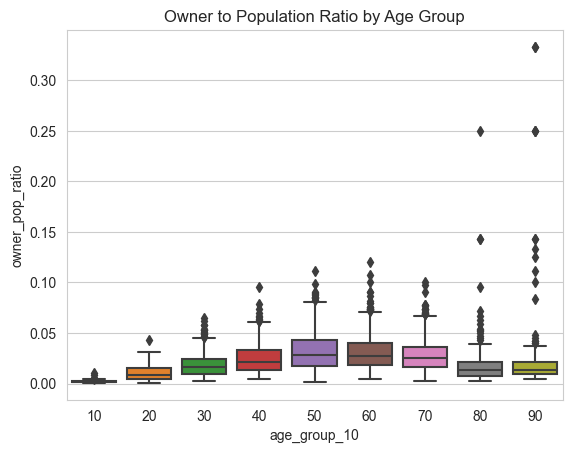

In [100]:
# Create boxplot to show distribution of 'owner_pop_ratio' across 'age_group_10'
sns.boxplot(x="age_group_10", y="owner_pop_ratio", data=merged_grouped_4_cols)

plt.title(f"Owner to Population Ratio by Age Group")
plt.show()

In [101]:
merged_grouped_4_cols.loc[
    merged_grouped_4_cols["sub_district"].isin(highlighted_sub_districts)
]

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio
174,2015,052,False,20,486,12,0.024691
175,2015,052,False,30,751,13,0.017310
176,2015,052,False,40,392,9,0.022959
177,2015,052,False,50,250,13,0.052000
178,2015,052,False,60,134,1,0.007463
...,...,...,...,...,...,...,...
3601,2022,074,True,50,747,28,0.037483
3602,2022,074,True,60,501,12,0.023952
3603,2022,074,True,70,450,13,0.028889
3604,2022,074,True,80,341,9,0.026393


In [102]:
# g = sns.FacetGrid(merged_grouped_4_cols, col="age_group_10", row="sub_district")
# g.map(sns.histplot, "owner_pop_ratio")

In [103]:
merged_grouped_4_cols.query("roster >= 2015 & roster <= 2020").head(20)

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio
0,2015,011,False,30,304,5,0.016447
1,2015,011,False,40,196,13,0.066327
2,2015,011,False,50,186,13,0.069892
3,2015,011,False,60,175,4,0.022857
4,2015,011,False,70,117,1,0.008547
5,2015,011,False,80,63,1,0.015873
6,2015,011,True,20,324,1,0.003086
7,2015,011,True,30,354,6,0.016949
8,2015,011,True,40,258,3,0.011628
9,2015,011,True,50,262,4,0.015267


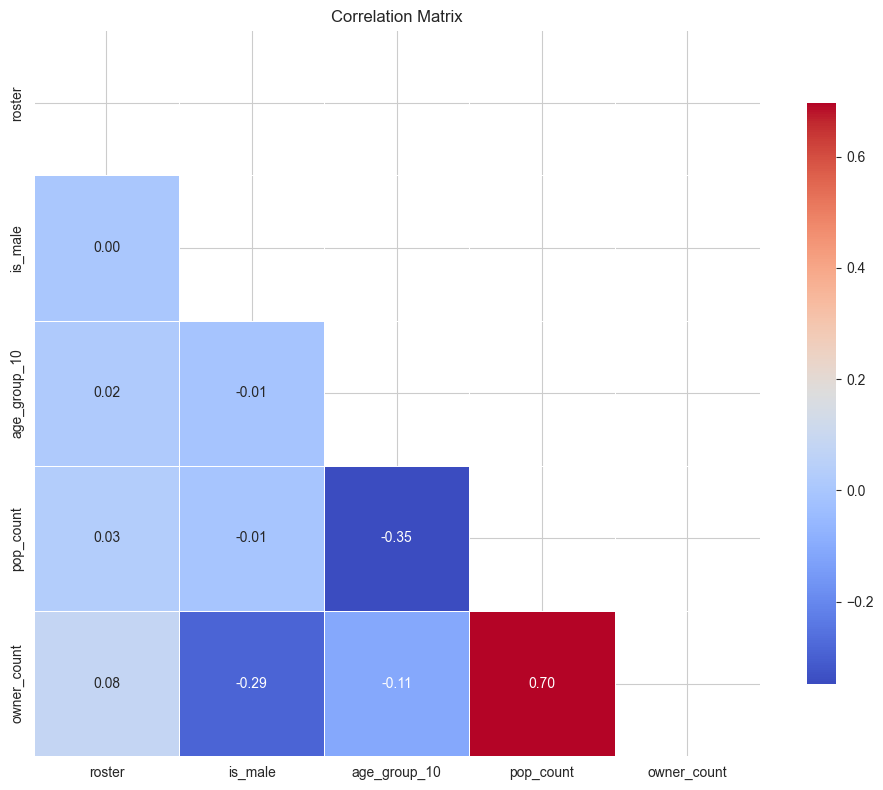

In [104]:
corr = (
    pop_count_grouped_4_cols.merge(dog_owner_grouped_4_cols, how="outer")
    .fillna(0)
    .corr(numeric_only=True)
)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap plot with a color gradient
sns.heatmap(
    corr.mask(mask),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

# Set the title and labels
ax.set_title("Correlation Matrix")

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [105]:
pop_data_filtered.sample().T

,208
roster,2015
sub_district,034
is_male,True
age_group_10,70
neighborhood,Sihlfeld
pop_count,393


#### Zurich Income Dataset
These data contain quantile values of the taxable income of natural persons who are primarily taxable in the city of Zurich. Tax income are in thousand francs (integer).

In [106]:
# zurich_income_link = "https://data.stadt-zuerich.ch/dataset/fd_median_einkommen_quartier_od1003/download/WIR100OD1003.csv"
zurich_income_link = (
    "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_income.csv"
)
zurich_income_data = pd.read_csv(zurich_income_link)
zurich_income_data.info()
zurich_income_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StichtagDatJahr      2244 non-null   int64  
 1   QuarSort             2244 non-null   int64  
 2   QuarCd               2244 non-null   int64  
 3   QuarLang             2244 non-null   object 
 4   SteuerTarifSort      2244 non-null   int64  
 5   SteuerTarifCd        2244 non-null   int64  
 6   SteuerTarifLang      2244 non-null   object 
 7   SteuerEinkommen_p50  2181 non-null   float64
 8   SteuerEinkommen_p25  2181 non-null   float64
 9   SteuerEinkommen_p75  2181 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 175.4+ KB


Index(['StichtagDatJahr', 'QuarSort', 'QuarCd', 'QuarLang', 'SteuerTarifSort',
       'SteuerTarifCd', 'SteuerTarifLang', 'SteuerEinkommen_p50',
       'SteuerEinkommen_p25', 'SteuerEinkommen_p75'],
      dtype='object')

In [107]:
zurich_income_data = hf.sanitize_df_column_names(zurich_income_data)
zurich_income_data.info()
zurich_income_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deadline_date_year  2244 non-null   int64  
 1   quar_sort           2244 non-null   int64  
 2   quar_cd             2244 non-null   int64  
 3   quar_lang           2244 non-null   object 
 4   tax_tariff_sort     2244 non-null   int64  
 5   tax_tariff_cd       2244 non-null   int64  
 6   tax_tariff_long     2244 non-null   object 
 7   tax_income_p_50     2181 non-null   float64
 8   tax_income_p_25     2181 non-null   float64
 9   tax_income_p_75     2181 non-null   float64
dtypes: float64(3), int64(5), object(2)
memory usage: 175.4+ KB


Index(['deadline_date_year', 'quar_sort', 'quar_cd', 'quar_lang',
       'tax_tariff_sort', 'tax_tariff_cd', 'tax_tariff_long',
       'tax_income_p_50', 'tax_income_p_25', 'tax_income_p_75'],
      dtype='object')

In [108]:
zurich_income_data.sample(5)

,deadline_date_year,quar_sort,quar_cd,quar_lang,tax_tariff_sort,tax_tariff_cd,tax_tariff_long,tax_income_p_50,tax_income_p_25,tax_income_p_75
944,2008,33,33,Friesenberg,2,2,Einelternfamilientarif,38.40,24.60,52.90
1430,2013,11,11,Rathaus,2,2,Einelternfamilientarif,52.60,29.15,97.15
1132,2010,14,14,City,1,1,Verheiratetentarif,112.00,66.60,184.70
46,1999,61,61,Unterstrass,1,1,Verheiratetentarif,63.80,45.60,89.85
1227,2011,12,12,Hochschulen,0,0,Grundtarif,42.35,12.90,72.30


In [109]:
# Extract unique values from 'tax_tariff_long' column and convert to list
tax_tariff_long_de = zurich_income_data.tax_tariff_long.unique().tolist()

# Translate the list to a dictionary using a helper function
tax_tariff_long_translated = translate_list_to_dict(tax_tariff_long_de)

# Display the translated dictionary for verification
display(tax_tariff_long_translated)

# Map the translated dictionary to 'tax_tariff_long' column, creating a new 'tax_status' column
zurich_income_data["tax_status"] = zurich_income_data.tax_tariff_long.map(
    tax_tariff_long_translated
)

# Create new columns with copied data for further processing
zurich_income_data["neighborhood"] = zurich_income_data["quar_lang"].copy()
zurich_income_data["roster"] = zurich_income_data["deadline_date_year"].copy()

# Create 'sub_district' column, ensuring it's a string with leading zeros
zurich_income_data["sub_district"] = (
    zurich_income_data["quar_cd"].copy().astype(str).str.zfill(3)
)

# Create 'district' column by extracting first two characters from 'sub_district'
zurich_income_data["district"] = (
    zurich_income_data["sub_district"].str[:2].astype(int).copy()
)

# Create new columns for income percentiles
zurich_income_data["median_income"] = zurich_income_data["tax_income_p_50"].copy()
zurich_income_data["lower_q_income"] = zurich_income_data["tax_income_p_25"].copy()
zurich_income_data["upper_q_income"] = zurich_income_data["tax_income_p_75"].copy()

# Define a list of columns of interest for the final dataframe
columns_of_interest_income = [
    "neighborhood",
    "roster",
    "district",
    "sub_district",
    "tax_status",
    "median_income",
    "lower_q_income",
    "upper_q_income",
]

# Create a new dataframe 'income_data' with only the columns of interest
income_data = zurich_income_data[columns_of_interest_income].copy()

# Display the structure of 'income_data' dataframe for verification
income_data.info()

{'Grundtarif': 'Basic tariff',
 'Verheiratetentarif': 'Married rate',
 'Einelternfamilientarif': 'Single-parent family tariff'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   neighborhood    2244 non-null   object 
 1   roster          2244 non-null   int64  
 2   district        2244 non-null   int32  
 3   sub_district    2244 non-null   object 
 4   tax_status      2244 non-null   object 
 5   median_income   2181 non-null   float64
 6   lower_q_income  2181 non-null   float64
 7   upper_q_income  2181 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 131.6+ KB


In [110]:
income_data.describe(include="all").T.sort_values(by="unique").fillna("")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tax_status,2244.0,3,Basic tariff,748,,,,,,,
neighborhood,2244.0,34,Rathaus,66,,,,,,,
sub_district,2244.0,34,011,66,,,,,,,
roster,2244.0,,,,2009.5,6.345703,1999.0,2004.0,2009.5,2015.0,2020.0
district,2244.0,,,,6.235294,3.582277,1.0,3.0,6.5,9.0,12.0
median_income,2181.0,,,,59.327873,27.796075,24.65,39.9,51.1,68.8,172.9
lower_q_income,2181.0,,,,33.823599,19.26041,0.0,19.8,26.7,45.3,108.0
upper_q_income,2181.0,,,,93.632983,47.332174,40.2,61.5,78.9,104.6,292.85


In [111]:
income_data.sample(10)

,neighborhood,roster,district,sub_district,tax_status,median_income,lower_q_income,upper_q_income
1101,Wipkingen,2009,10,102,Basic tariff,44.10,22.70,66.10
1751,Leimbach,2016,2,023,Single-parent family tariff,40.40,18.60,58.30
341,Langstrasse,2002,4,042,Single-parent family tariff,34.55,17.80,50.60
1926,Seebach,2017,11,119,Basic tariff,39.20,17.80,61.30
192,Seebach,2000,11,119,Basic tariff,33.20,17.90,49.70
1362,Hard,2012,4,044,Basic tariff,34.50,17.20,54.30
1811,Altstetten,2016,9,092,Single-parent family tariff,37.85,19.15,59.40
1820,Affoltern,2016,11,111,Single-parent family tariff,39.15,20.00,60.35
1716,Affoltern,2015,11,111,Basic tariff,38.40,18.00,58.50
815,Hirzenbach,2006,12,123,Single-parent family tariff,29.55,7.80,41.40


In [160]:
income_agg_data_to_merge = (
    income_data.query("roster >= 2015")
    .groupby(["roster", "sub_district"])["median_income"]
    .median()
    .reset_index()
)
# income_agg
# income_data.query("roster >= 2015")[
#     ["roster", "sub_district", "median_income", "tax_status"]
# ].merge(merged_grouped_4_cols, on=["roster", "sub_district"], how="inner")

merged_3_datasets = pd.merge(
    merged_grouped_4_cols.query("roster >= 2015 & roster <= 2020"),
    income_agg_data_to_merge,
    on=["roster", "sub_district"],
    how="left",
)
merged_3_datasets.head(20)

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio,median_income
0,2015,011,False,30,304,5,0.016447,52.450
1,2015,011,False,40,196,13,0.066327,52.450
2,2015,011,False,50,186,13,0.069892,52.450
3,2015,011,False,60,175,4,0.022857,52.450
4,2015,011,False,70,117,1,0.008547,52.450
5,2015,011,False,80,63,1,0.015873,52.450
6,2015,011,True,20,324,1,0.003086,52.450
7,2015,011,True,30,354,6,0.016949,52.450
8,2015,011,True,40,258,3,0.011628,52.450
9,2015,011,True,50,262,4,0.015267,52.450


#### Zurich Household Dataset
Number of private households as well as the economic population of the city of Zurich in private households by household size, urban district, statistical urban district and year, since 2013.

A household includes all persons who live together in the same apartment. For this purpose, the term "economic residence" is used for persons. Collective households (homes, hospitals, penal institutions, communal accommodation for asylum seekers, etc.) are not taken into account.

In [161]:
zurich_household_data_link = "https://data.stadt-zuerich.ch/dataset/bev_hh_haushaltsgroesse_quartier_seit2013_od3806/download/BEV380OD3806.csv"
zurich_household_data_link = (
    "https://storage.googleapis.com/mrprime_dataset/zurich/zurich_household.csv"
)
zurich_household_data = pd.read_csv(zurich_household_data_link)
zurich_household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   StichTagDatJahr  2040 non-null   int64 
 1   QuarSort         2040 non-null   int64 
 2   QuarLang         2040 non-null   object
 3   KreisSort        2040 non-null   int64 
 4   KreisLang        2040 non-null   object
 5   hh_groesseSort   2040 non-null   int64 
 6   hh_groesseLang   2040 non-null   object
 7   AnzHH            2040 non-null   int64 
 8   AnzBestWir       2040 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 143.6+ KB


In [162]:
zurich_household_data = hf.sanitize_df_column_names(zurich_household_data)
zurich_household_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   key_day_dat_year  2040 non-null   int64 
 1   quar_sort         2040 non-null   int64 
 2   quar_lang         2040 non-null   object
 3   circle_sort       2040 non-null   int64 
 4   circle_lang       2040 non-null   object
 5   hh_size_sort      2040 non-null   int64 
 6   hh_size_lang      2040 non-null   object
 7   number_hh         2040 non-null   int64 
 8   number_we         2040 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 143.6+ KB


In [163]:
zurich_household_data.sample(5)

,key_day_dat_year,quar_sort,quar_lang,circle_sort,circle_lang,hh_size_sort,hh_size_lang,number_hh,number_we
1882,2022,31,Alt-Wiedikon,3,Kreis 3,5,5 Personen,194,970
1637,2021,11,Rathaus,1,Kreis 1,6,6 Personen und mehr,9,60
1394,2019,111,Affoltern,11,Kreis 11,3,3 Personen,1663,4989
950,2017,82,Mühlebach,8,Kreis 8,3,3 Personen,327,981
978,2017,102,Wipkingen,10,Kreis 10,1,1 Person,4076,4076


In [164]:
zurich_household_data["neighborhood"] = zurich_household_data["quar_lang"].copy()
zurich_household_data["roster"] = zurich_household_data["key_day_dat_year"].copy()
zurich_household_data["sub_district"] = (
    zurich_household_data["quar_sort"].copy().astype(str).str.zfill(3)
)
zurich_household_data["district"] = (
    zurich_household_data["sub_district"].str[:2].astype(int).copy()
)
zurich_household_data["household_size"] = (
    zurich_household_data["hh_size_sort"].copy().astype(str).str.zfill(2)
)
zurich_household_data["household_count"] = zurich_household_data["number_hh"].copy()
zurich_household_data["resident_count"] = zurich_household_data["number_we"].copy()

# create a dataframe with only the columns of interest
columns_of_interest_household = [
    "neighborhood",
    "roster",
    "district",
    "sub_district",
    "household_size",
    "household_count",
    "resident_count",
]
household_data = zurich_household_data[columns_of_interest_household].query(
    'roster >= 2015 & roster <= 2020')

household_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 408 to 1631
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   neighborhood     1224 non-null   object
 1   roster           1224 non-null   int64 
 2   district         1224 non-null   int32 
 3   sub_district     1224 non-null   object
 4   household_size   1224 non-null   object
 5   household_count  1224 non-null   int64 
 6   resident_count   1224 non-null   int64 
dtypes: int32(1), int64(3), object(3)
memory usage: 71.7+ KB


In [165]:
household_data.head(10)

,neighborhood,roster,district,sub_district,household_size,household_count,resident_count
408,Rathaus,2015,1,011,01,1151,1151
409,Rathaus,2015,1,011,02,501,1002
410,Rathaus,2015,1,011,03,129,387
411,Rathaus,2015,1,011,04,79,316
412,Rathaus,2015,1,011,05,18,90
413,Rathaus,2015,1,011,06,11,69
414,Hochschulen,2015,1,012,01,109,109
415,Hochschulen,2015,1,012,02,69,138
416,Hochschulen,2015,1,012,03,14,42
417,Hochschulen,2015,1,012,04,17,68


In [166]:
household_data.describe(include="all").T.sort_values(by="unique").fillna("")

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
household_size,1224.0,6,01,204,,,,,,,
neighborhood,1224.0,34,Rathaus,36,,,,,,,
sub_district,1224.0,34,011,36,,,,,,,
roster,1224.0,,,,2017.5,1.708523,2015.0,2016.0,2017.5,2019.0,2020.0
district,1224.0,,,,6.235294,3.582943,1.0,3.0,6.5,9.0,12.0
household_count,1224.0,,,,993.111928,1285.443441,1.0,118.0,471.0,1348.25,7515.0
resident_count,1224.0,,,,1996.995915,1857.004186,9.0,615.75,1397.5,2856.0,10500.0


In [167]:
# Calculate total residents per sub_district
household_data["total_residents"] = household_data.groupby(["roster", "sub_district"])[
    "resident_count"
].transform("sum")

# Calculate the total households per sub_district
household_data["total_households"] = household_data.groupby(["roster", "sub_district"])[
    "household_count"
].transform("sum")

# Average household size
household_data["avg_household_size"] = (
    household_data["total_residents"] / household_data["total_households"]
)

# Calculate weighted average household size
household_data["resident_portion"] = (
    household_data["resident_count"] / household_data["total_residents"]
)
# household_data

hh_data_to_merge = (
    household_data.groupby(["roster", "sub_district"])[
        ["avg_household_size", "total_households"]
    ]
    .mean()
    .reset_index()
)

In [168]:
merged_4_datasets = pd.merge(
    merged_3_datasets,
    hh_data_to_merge,
    on=["roster", "sub_district"],
    how="left",
)


merged_4_datasets.head(20)

,roster,sub_district,is_male,age_group_10,pop_count,owner_count,owner_pop_ratio,median_income,avg_household_size,total_households
0,2015,011,False,30,304,5,0.016447,52.450,1.596083,1889.0
1,2015,011,False,40,196,13,0.066327,52.450,1.596083,1889.0
2,2015,011,False,50,186,13,0.069892,52.450,1.596083,1889.0
3,2015,011,False,60,175,4,0.022857,52.450,1.596083,1889.0
4,2015,011,False,70,117,1,0.008547,52.450,1.596083,1889.0
5,2015,011,False,80,63,1,0.015873,52.450,1.596083,1889.0
6,2015,011,True,20,324,1,0.003086,52.450,1.596083,1889.0
7,2015,011,True,30,354,6,0.016949,52.450,1.596083,1889.0
8,2015,011,True,40,258,3,0.011628,52.450,1.596083,1889.0
9,2015,011,True,50,262,4,0.015267,52.450,1.596083,1889.0


##### Local Indicators of Spatial Association (LISA)
This LISA plot shows spatial autocorrelation of number of dog owners per sub-district in 2020. Quadrants represent:

1. High-High (HH): "Hot spots" of high dog ownership.
2. Low-Low (LL): "Cold spots" of low dog ownership.
3. High-Low (HL) and Low-High (LH): "Spatial outliers" of contrasting dog ownership.

Areas with p-value < 0.05 are statistically significant and highlighted. This reveals spatial distribution and clustering of dog owners across sub-districts.

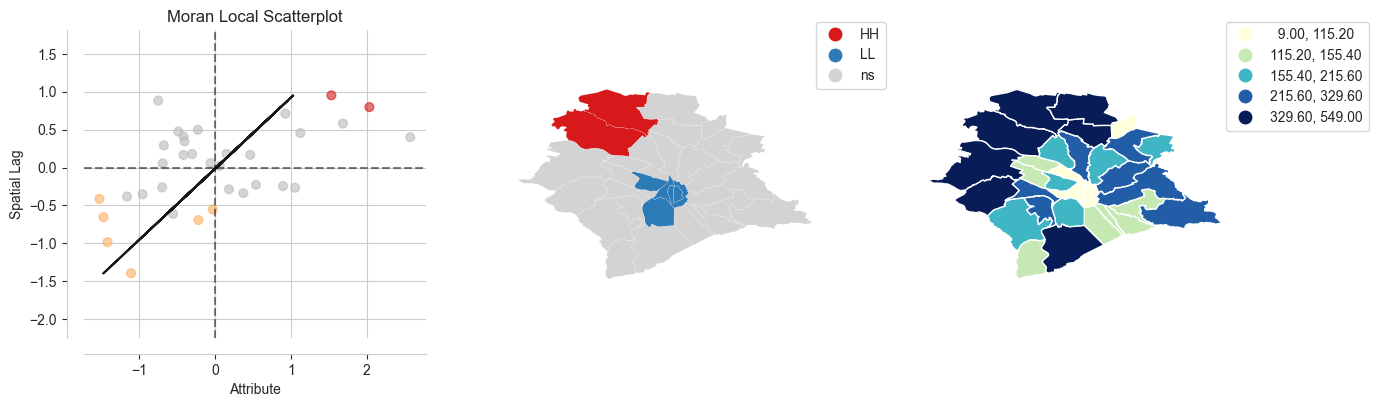

In [99]:
df_for_spatial_analysis = filtered_dog_data[["roster", "sub_district", "owner_id"]]

lisa_df = pd.DataFrame()

for roster in [2020]:
    df = df_for_spatial_analysis.loc[df_for_spatial_analysis["roster"] == roster]
    df = (
        df.groupby("sub_district")["owner_id"].nunique().reset_index(name="owner_count")
    )
    df = df.set_index("sub_district")
    n_gdf = neighborhood_gdf.set_index("sub_district")
    n_gdf = n_gdf.merge(df, left_index=True, right_index=True, how="left")

    w = lps.weights.Queen.from_dataframe(n_gdf, use_index=False)
    w.transform = "r"

    # Standardize the attribute
    y = (n_gdf["owner_count"] - n_gdf["owner_count"].mean()) / n_gdf[
        "owner_count"
    ].std()

    li = Moran_Local(y, w)
    plot_local_autocorrelation(
        li,
        n_gdf,
        "owner_count",
        p=0.05,
        aspect_equal=True,
    )

    # Save the LISA values in the DataFrame
    lisa_df[roster] = li.Is

# Set the index of the DataFrame to be the sub-districts
lisa_df.index = n_gdf.index


# lisa_df

In [108]:
# dog_data["age_group_10"] = pd.Categorical(dog_data["age_group_10"], ordered=True)


# dog_data["age_group_10"].cat.categories


# dog_data["roster"] = dog_data["roster"].astype(str)


# dog_data["roster"] = pd.Categorical(dog_data["roster"], ordered=True)


# dog_data["roster"].cat.categories

In [109]:
dog_data.sample()
zurich_income_data.loc[zurich_income_data["roster"] > 2014][
    ["tax_status", "tax_income_p_50", "district", "sub_district", "roster"]
]
tax_status_button = pnw.RadioButtonGroup(
    name="Tax Status",
    options=list(zurich_income_data["tax_status"].unique()),
    value="Basic tariff",
    button_style="outline",
    button_type="success",
)
roster_button = pnw.RadioButtonGroup(
    value=2018,
    options=list(range(2015, 2021)),
    button_style="outline",
    button_type="success",
)


@pn.depends(roster_button.param.value, tax_status_button.param.value)
def get_income_polygon(roster, tax_status):
    df = zurich_income_data.loc[
        (zurich_income_data["roster"] == roster)
        & (zurich_income_data["tax_status"] == tax_status)
    ][["roster", "tax_status", "tax_income_p_50", "sub_district"]]

    income_gdf = neighborhood_gdf.merge(df, on="sub_district")
    # income_gdf = income_gdf.drop(columns=["km2"])

    income_cmap = list(sns.color_palette(
        "light:" + "#008800", n_colors=6).as_hex())
    return gv.Polygons(income_gdf).opts(
        **poly_opts,
        color="tax_income_p_50",
        # fill_alpha=0,
        cmap=income_cmap,
        clim=(30, 100),
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        title=f"{tax_status.title()} | {roster}",
    )


income_chloropleth = pn.pane.HoloViews(get_income_polygon)

pn.Column(tax_status_button, roster_button, get_income_polygon)

BokehModel(combine_events=True, render_bundle={'docs_json': {'30928584-241b-4cee-bd02-f72ac61bb48c': {'version…

In [103]:
unique_breeds = dog_data["standard"].unique()
num_unique_breeds = len(unique_breeds)

# Repeat the colormap to cover all unique breeds
repeated_cmap = list(cc.glasbey_dark) * (num_unique_breeds // len(cc.glasbey_dark) + 1)

# Explicit mapping for the color to use for each standard breed
explicit_mapping = {breed: repeated_cmap[i] for i, breed in enumerate(unique_breeds)}
my_colors = hv.Cycle(list(explicit_mapping.values()))


# colormaps for the the gender
boy_cmap = list(sns.color_palette("light:#00008b", n_colors=6).as_hex())


girl_cmap = list(sns.color_palette("light:#8b008b", n_colors=6).as_hex())

In [104]:
neighborhood_gdf["km2"] = neighborhood_gdf.to_crs(ccrs.GOOGLE_MERCATOR).area / 10**6

neighborhood_gdf["km2"] = neighborhood_gdf["km2"].round(2)

districts_gdf["km2"] = districts_gdf.to_crs(ccrs.GOOGLE_MERCATOR).area / 10**6

districts_gdf["km2"] = districts_gdf["km2"].round(2)

districts_gdf

,district,geometry,km2
0,1,"POLYGON ((8.54195 47.37971, 8.54196 47.37972, ...",3.92
1,2,"POLYGON ((8.51982 47.32401, 8.51974 47.32401, ...",24.09
2,3,"POLYGON ((8.51943 47.35125, 8.51889 47.35111, ...",18.84
3,4,"POLYGON ((8.53301 47.37394, 8.53299 47.37392, ...",6.33
4,5,"POLYGON ((8.52834 47.38939, 8.52862 47.38919, ...",4.35
5,6,"POLYGON ((8.54797 47.39915, 8.54801 47.39918, ...",11.12
6,7,"POLYGON ((8.60185 47.37186, 8.60188 47.37178, ...",32.72
7,8,"POLYGON ((8.56493 47.34636, 8.56458 47.34619, ...",10.47
8,9,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...",26.28
9,10,"POLYGON ((8.52545 47.40667, 8.52574 47.40675, ...",19.82


In [113]:
hv.opts.defaults(
    hv.opts.HeatMap(
        tools=["hover", "tap", "box_select"],
        active_tools=["box_zoom"],
        width=800,
        height=500,
        ylabel="",
        line_color="white",
        line_width=2,
        toolbar="above",
        selection_line_color="red",
        nonselection_alpha=0.9,
        nonselection_line_color="white",
    )
)

poly_opts = dict(
    width=800,
    height=500,
    line_width=2,
    xaxis=None,
    yaxis=None,
    aspect="equal",
    # cmap=explicit_mapping,
    # projection=ccrs.GOOGLE_MERCATOR,
)
bar_opts = dict(
    invert_axes=True,
    width=800,
    height=500,
    tools=["hover", "tap", "box_select"],
    xaxis=None,
    ylabel="",
    xlabel="",
    cmap=explicit_mapping,
    show_legend=False,
    active_tools=["box_zoom"],
)

In [114]:
tools_opts = dict(active_tools=["box_zoom"], toolbar="above")
# bar plot of the owner age distribution
owner_age_groups_all = (
    dog_data.groupby(["age_group_10", "roster"])
    .size()
    .unstack()
    .rename(columns={0: "Count"})
    .hvplot.bar(
        xlabel="",
        rot=90,
        legend=True,
        tools=["hover", "box_select"],
        title="Owners Age distribution",
        muted_line_alpha=0.01,
    )
    .opts(**tools_opts)
)
# kde plot of the dog age distribution
dog_age_all = dog_data.hvplot.kde(
    y="dog_age",
    by="roster",
    xlim=(0, 21),
    ylim=(0, 0.1),
    xlabel="",
    legend=True,
    tools=["hover", "box_select"],
    title="Dog Age Density distribution",
    muted_alpha=0.01,
).opts(**tools_opts)
# step plot of the dog age distribution
dog_age_all_step = (
    dog_data.groupby(["dog_age", "roster"])
    .size()
    .hvplot.step(
        x="dog_age",
        by="roster",
        xlim=(0, 21),
        title="Dog Age distribution",
    )
    .opts(**tools_opts)
)
# panel card with the 3 plots
all_ages_card = pn.Card(
    # add spacer
    pn.Spacer(height=70),
    dog_age_all_step,
    dog_age_all,
    owner_age_groups_all,
    title="Age Distribution for ALL Dogs and Owners",
    styles={"background": "gainsboro"},
)

In [115]:
pn.state.kill_all_servers()
all_ages_card

BokehModel(combine_events=True, render_bundle={'docs_json': {'040309f1-f07e-4efb-bc66-97df4aa1d589': {'version…

In [116]:
def plot_age_range_stats(df, breed, bw, is_pure_breed):
    """Function to plot the age_range stats for the breed owners and the dog age distribution"""
    if is_pure_breed:
        breed_df = df.query(
            f'standard.str.contains("{breed}", case=False, regex=True, na=False) & is_pure_breed == True'
        )
    else:
        breed_df = df.query(
            f'standard.str.contains("{breed}", case=False, regex=True, na=False)'
        )
    # plot a step plot of the dog_age
    step = (
        breed_df.groupby(["dog_age", "roster"])
        .size()
        .unstack()
        .hvplot.step(
            title=f"Dog Age distribution | {breed.title()}",
            shared_axes=False,
            muted_alpha=0.1,
        )
    )

    # plot age_range of breed_df kde plot
    kde = breed_df.hvplot.kde(
        y="dog_age",
        by="roster",
        bandwidth=bw,
        xlim=(0, 20),
        ylim=(0, None),
        xlabel="",
        muted_alpha=0.01,
        title=f"Dog Age density distribution | {breed.title()}",
    )
    # plot age_range of breed_df bar plot

    bar = (
        breed_df.groupby(["age_group_10", "roster"])
        .size()
        .unstack()
        .hvplot.bar(
            rot=90,
            legend=True,
            tools=["hover", "box_select"],
            title=f"Owner Age distribution | {breed.title()} ",
            shared_axes=False,
            xlabel="",
        )
        .opts(active_tools=["box_select"])
    )
    return (step + kde + bar).cols(1)


# create widgets for the breed, bandwidth
breed_selector = pnw.Select(name="Breed", options=topn, value="french bulldog")
top_n_slider = pnw.IntSlider(name="Top N", start=1, end=30, step=1, value=10, width=200)
bandwidth_slider = pnw.FloatSlider(
    name="Bandwidth", start=0.1, end=2, step=0.1, value=0.5, width=200
)
pure_breed_checkbox = pnw.Checkbox(name="Pure Breed", value=True, width=200)
is_male_owner_checkbox = pnw.Checkbox(name="Male Dog Owner", value=True, width=200)
roster_slider = pnw.DiscreteSlider(
    options=["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"],
    name="Roster",
    width=200,
)
show_labels_checkbox = pnw.Checkbox(name="Show Annotations", value=True, width=200)


# create a dynamic map

dynamic_age_plot = pn.bind(
    plot_age_range_stats,
    df=dog_data,
    breed=breed_selector,
    bw=bandwidth_slider,
    is_pure_breed=pure_breed_checkbox,
)
widget_controls = pn.Row(
    pure_breed_checkbox,
    breed_selector,
    bandwidth_slider,
    styles={"background": "mintcream"},
)
dynamic_age_card = pn.Card(
    widget_controls,
    dynamic_age_plot,
    title="Age Distribution of Dog and Owners by Breeds",
    styles={"background": "mintcream"},
)

In [117]:
# pn.Column(dynamic_age_card).show()
districts_gdf = districts_gdf.dissolve(by="district")
districts_gdf
# dog_data
# dynamic_age_card

,geometry,km2
district,,
1,"POLYGON ((8.54195 47.37971, 8.54196 47.37972, ...",3.92
2,"POLYGON ((8.51982 47.32401, 8.51974 47.32401, ...",24.09
3,"POLYGON ((8.51943 47.35125, 8.51889 47.35111, ...",18.84
4,"POLYGON ((8.53301 47.37394, 8.53299 47.37392, ...",6.33
5,"POLYGON ((8.52834 47.38939, 8.52862 47.38919, ...",4.35
6,"POLYGON ((8.54797 47.39915, 8.54801 47.39918, ...",11.12
7,"POLYGON ((8.60185 47.37186, 8.60188 47.37178, ...",32.72
8,"POLYGON ((8.56493 47.34636, 8.56458 47.34619, ...",10.47
9,"POLYGON ((8.50127 47.37961, 8.50121 47.37957, ...",26.28


In [135]:
filtered_dog_data

,owner_id,is_male_owner,is_male_dog,age_group_10,dog_age,district,sub_district,neighborhood,roster,pet_count,mixed_type,is_pure_breed,breed_type,dog_color_en,breed_2_en,standard,age_group_10_missing
0,000126,True,False,60,3.0,9.0,092,Altstetten,2015,1,PB,True,K,black/brown,no,welsh terrier,0
1,084431,False,False,70,10.0,7.0,071,Fluntern,2015,1,PB,True,K,black/tan,no,welsh terrier,0
2,088455,False,True,40,15.0,7.0,074,Witikon,2015,1,PB,True,K,black red,no,welsh terrier,0
3,101835,False,True,40,4.0,8.0,082,Mühlebach,2015,1,PB,True,K,Brown black,no,welsh terrier,0
4,108769,True,False,60,4.0,3.0,031,Alt-Wiedikon,2015,1,PB,True,K,black/tan,no,welsh terrier,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71177,148907,False,True,20,0.0,11.0,115,Oerlikon,2020,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71178,148907,False,True,20,1.0,11.0,115,Oerlikon,2021,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71179,148907,False,True,20,2.0,11.0,115,Oerlikon,2022,1,BB,False,I,black/brown,white shepherd dog (berger blanc suisse),yugoslavian shepherd dog - sharplanina,0
71181,159827,False,True,30,2.0,9.0,091,Albisrieden,2022,1,BB,False,I,white/black/brown,brandlbracke,pyrenean mountain dog,0


In [132]:
pn.state.kill_all_servers()


# get the count of the french bulldog in each district for each roster and plot it
# plot it on a dynamic map with a slider for the roster
def get_breed_count(breed, roster):
    df = filtered_dog_data[
        (filtered_dog_data["standard"] == breed)
        & (filtered_dog_data["roster"] == roster)
    ][["district", "standard", "roster"]]
    df = df.groupby("district").size().reset_index(name="count")
    df = df.set_index("district")

    breed_gdf = districts_gdf.merge(
        df, left_index=True, right_index=True, how="left")
    # breed_gdf = breed_gdf.drop(columns=["desc", "km2"])
    breed_color = explicit_mapping[breed]
    # Start from white and go to the breed color
    breed_cmap = list(sns.color_palette(
        "light:" + breed_color, n_colors=6).as_hex())
    return gv.Polygons(breed_gdf).opts(
        **poly_opts,
        color="count",
        # fill_alpha=0,
        cmap=breed_cmap,
        clim=(0, 50),
        colorbar=True,
        tools=["hover", "tap", "box_select"],
        title=f"{breed.title()} | {roster}",
    )


standard_selector = pnw.Select(
    name="Breed", options=topn, value="french bulldog")
# create the dynamic map
breed_chloro = gv.DynamicMap(
    pn.bind(get_breed_count, breed=standard_selector, roster=roster_button)
)

In [134]:
basemap = gv.tile_sources.OSM().opts(alpha=0.5, bgcolor="black")
pn.Column(standard_selector, pn.Row(roster_button, breed_chloro)).show()
# breed_chloro

Launching server at http://localhost:65130


In [ ]:
pn.state.kill_all_servers()


neighborhood_poly = gv.Polygons(neighborhood_gdf).opts(
    tools=["hover", "tap"],
    **poly_opts,
    line_color="crimson",
    # fill_color="lightgray",
    # fill_alpha=0,
    alpha=0.2,
)
neighborhood_poly

pn.pane.HoloViews(breed_chloro)

BokehModel(combine_events=True, render_bundle={'docs_json': {'cadfea61-bfc9-4492-8aa2-f43488d9e908': {'version…

In [ ]:
neighborhood_poly.data
breed_chloro.data

{(): :Polygons   [Longitude,Latitude]   (km2,count)}

In [ ]:
districts_gdf = (
    neighborhood_gdf.dissolve(by="district")
    .drop(columns=["neighborhood", "sub_district"])
    .reset_index()
)

districts_poly = gv.Polygons(districts_gdf).opts(
    **poly_opts,
    color_index=None,
)

# (district_poly * neighborhood_poly).opts(title="Zurich Districts and Neighborhoods")

In [ ]:
zurich_desc_path = "../data/zurich_districts.csv"
zurich_desc = pd.read_csv(zurich_desc_path)
# zurich_desc["district"] = zurich_desc["district"].astype(str).str.zfill(2)
districts_gdf["district"] = districts_gdf["district"].astype(int)

districts_gdf = districts_gdf.merge(
    zurich_desc[["district", "desc", "district_name"]], on="district", how="left"
)
# districts_gdf.set_index("district", inplace=True)
districts_poly = gv.Polygons(districts_gdf)

In [ ]:
districts_gdf = districts_gdf.dissolve(by="district")
districts_poly = gv.Polygons(districts_gdf)

In [ ]:
# create a stream which selects a district from the map
select_district = streams.Selection1D(source=districts_poly)


def display_info(index):
    if not index:
        return pn.pane.Markdown("No district selected")
    else:
        selected_district = (
            districts_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        return pn.pane.Markdown(
            f"#### {dnum}\n ### {dname}\n {ddesc}",
        )


def display_wordcloud(index, breed):
    breed_color = explicit_mapping[breed]
    if len(index) == 0:
        text = "district select on map"
        wordcloud = WordCloud(width=800, height=500, background_color="white").generate(
            text
        )
        return hv.RGB(np.array(wordcloud))
    else:
        selected_district = (
            districts_poly.iloc[index[0]]
            .data[["district", "district_name", "desc"]]
            .drop_duplicates()
        )
        dname = selected_district["district_name"].values[0]
        dnum = selected_district["district"].values[0]
        ddesc = selected_district["desc"].values[0]
        text = f"{dnum} {dname} {ddesc}"

        polygon = districts_poly.iloc[index[0]].data["geometry"].iloc[0]

        # Get the bounding box of the polygon
        minx, miny, maxx, maxy = polygon.bounds

        # Calculate the width and height of the bounding box
        width = maxx - minx
        height = maxy - miny

        # Create a new image with the same aspect ratio as the bounding box
        image_width = 800
        image_height = int(image_width * height / width)
        test = Image.new("1", (image_width, image_height), 0)

        # Convert the coordinates to a numpy array
        coords = np.array(list(polygon.exterior.coords))
        coords -= [minx, miny]
        coords *= [image_width / width, image_height / height]
        coords[:, 1] = image_height - coords[:, 1]
        # Convert the coordinates back to a list of tuples
        scaled_coords = list(map(tuple, coords))

        # Draw the scaled polygon onto the image
        ImageDraw.Draw(test).polygon(scaled_coords, outline=1, fill=1)

        wordcloud = WordCloud(
            mask=~np.array(test) * 255,
            color_func=lambda *args, **kwargs: breed_color,
            include_numbers=True,
            margin=20,
            contour_color=breed_color,
            contour_width=5,
            width=800,
            height=500,
            background_color="white",
        ).generate(text)
        return hv.RGB(np.array(wordcloud)).opts(
            width=800,
            height=500,
            tools=["box_zoom"],
            active_tools=["box_zoom"],
            xaxis=None,
            yaxis=None,
            # toolbar=None,
        )


layout = pn.Column(
    pn.bind(display_wordcloud, select_district.param.index, breed=breed_selector),
    districts_poly * breed_chloro,
    pn.bind(display_info, select_district.param.index),
    width=800,
)

breed_chloro_card = pn.Card(
    roster_slider, layout, title="Chloropleth of Selected Breed"
)

In [ ]:
dynamic_age_card

BokehModel(combine_events=True, render_bundle={'docs_json': {'c9f458a2-eaea-4c50-bdd5-039ac85b5b69': {'version…

In [ ]:
pn.Row(
    dynamic_age_card,
    breed_chloro_card,
    all_ages_card,
    sizing_mode="stretch_width",
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'04bd0380-260c-4b0c-ae26-8fd8677756b6': {'version…

Gender Heatmap


In [ ]:
# Create a Tap stream linked to the HeatMap
breed_tap = streams.Tap(source=None)


@pn.depends(roster_slider.param.value, is_male_owner_checkbox.param.value)
def get_gender_roster_df(roster, gender):
    return dog_data.loc[
        (dog_data["is_male_owner"] == gender) & (dog_data["roster"] == roster)
    ]


@pn.depends(
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
    top_n_slider.param.value,
)
def get_top_n_gender_breeds(roster, gender, top_n):
    gender_roster_df = get_gender_roster_df(roster=roster, gender=gender)
    return gender_roster_df["standard"].value_counts().head(top_n).index.tolist()


@pn.depends(
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
    top_n_slider.param.value,
)
def get_gender_heatmap(roster, gender, top_n):
    gender_roster_df = get_gender_roster_df(roster=roster, gender=gender)
    topn_gender_breeds = get_top_n_gender_breeds(
        roster=roster, gender=gender, top_n=top_n
    )

    top_gender_breeds_df = (
        gender_roster_df.loc[gender_roster_df["standard"].isin(
            topn_gender_breeds)]
        .groupby(["standard", "district"])
        .size()
        .fillna(0)
        .reset_index(name="count")
    )
    sex = "Male" if gender else "Female"
    top_gender_breeds_heatmap = hv.HeatMap(
        top_gender_breeds_df, ["district", "standard"], "count"
    ).redim(standard="gender_standard")
    top_gender_breeds_heatmap.opts(
        height=(33 * top_n) + 50,
        cmap=boy_cmap if gender else girl_cmap,
        colorbar=True,
        active_tools=["box_zoom"],
        title=f"Top {top_n} breeds | {roster} | {sex} Owners",
        clim=(0, 50),
    )
    breed_tap.source = top_gender_breeds_heatmap

    return top_gender_breeds_heatmap


dynamic_gender_heatmap_panel = pn.pane.HoloViews(get_gender_heatmap)

# pn.Column(
#     roster_slider,
#     holder_gender_checkbox,
#     top_n_slider,
#     dynamic_gender_heatmap_panel,
# ).show()

In [ ]:
@pn.depends(
    breed_tap.param.x,
    breed_tap.param.y,
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
)
def get_breed_chloropleth(x, y, roster, gender):
    if x is None or y is None:
        return gv.Polygons(districts_gdf).opts(**poly_opts, title="Select a cell")
    else:
        data = get_gender_roster_df(roster=roster, gender=gender)
        data = data.loc[data["standard"] == y]
        data = data.groupby("district").size().reset_index(name="count")
        data = data.set_index("district")

        breed_gdf = districts_gdf.merge(
            data, left_index=True, right_index=True, how="left"
        )
        # breed_gdf = breed_gdf.drop(columns=["desc", "km2"])
        breed_gdf.fillna(0, inplace=True)
        breed_color = explicit_mapping[y]
        breed_cmap = list(
            sns.color_palette("light:" + breed_color, n_colors=6).as_hex()
        )
        sex = "Male" if gender else "Female"

        return gv.Polygons(breed_gdf).opts(
            **poly_opts,
            color="count",
            cmap=breed_cmap,
            clim=(0, 50),
            colorbar=True,
            line_color="darkgray",
            tools=["hover", "tap", "box_select"],
            title=f"{y.title()} | {roster} | {sex} Owners",
        )


breed_chloropleth = pn.pane.HoloViews(get_breed_chloropleth)


# Combine the heatmap and the text display into a layout
layout = pn.Column(
    roster_slider,
    is_male_owner_checkbox,
    top_n_slider,
    dynamic_gender_heatmap_panel,
    breed_chloropleth,
)

# layout.show()

In [ ]:
`# Define a Tap stream linked to the owner age group`
owner_tap = streams.Tap(source=None, x=1, y=30)


@pn.depends(roster_slider.param.value, is_male_owner_checkbox.param.value)
def get_age_heatmap(roster, gender):
    data = get_gender_roster_df(roster=roster, gender=gender)
    data_grouped = (
        data.groupby(["district", "age_group_10"])["owner_id"]
        .nunique()
        .reset_index()
        .rename(columns={"owner_id": "count"})
    )
    sex = "Male" if gender else "Female"
    heatmap = hv.HeatMap(data_grouped, ["district", "age_group_10"], "count")

    heatmap.opts(
        # **heatmap_opts,
        cmap=boy_cmap if gender else girl_cmap,
        ylim=(0, 100),
        xlim=(0, 13),
        colorbar=True,
        active_tools=["box_zoom"],
        tools=["hover", "tap", "box_select"],
        title=f"{sex} Dog Owners | {roster} | by Age Group vs District",
    )
    owner_tap.source = heatmap
    return heatmap


age_group_panel = pn.pane.HoloViews(get_age_heatmap)

In [ ]:
dog_data["age_group_10"].cat.categories

Float64Index([-1.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0], dtype='float64')

In [ ]:
import math

pn.state.kill_all_servers()
# Bar Plot which shows the top 10 breeds for each district and age group as it is selected in the heatmap

bar_plots_opts = dict(
    height=500,
    width=800,
    invert_axes=True,
    cmap=explicit_mapping,
    show_legend=False,
    xlabel="",
    fontscale=1.2,
)


@pn.depends(
    owner_tap.param.x,
    owner_tap.param.y,
    roster_slider.param.value,
    is_male_owner_checkbox.param.value,
)
def update_barplot(x, y, roster, gender):
    data = get_gender_roster_df(roster=roster, gender=gender)
    if x is None or y is None:
        bar_data = (
            data["standard"]
            .value_counts()
            .head(10)
            .rename("count")
            .reset_index()
            .rename(columns={"index": "standard"})
        )
        return hv.Bars(bar_data, kdims=["standard"], vdims="count").opts(
            **bar_plots_opts,
            color="standard",
            title=f"Top 10 Breeds",
            tools=["hover"],
            active_tools=["box_zoom"],
        )
    x = math.ceil(x - 0.5)
    y = math.ceil(y / 10) * 10
    bar_data = (
        data.loc[(data["district"] == x) & (
            data["age_group_10"] == y)]["standard"]
        .value_counts()
        .head(10)
        .reset_index()
    )
    bar_data.columns = ["standard", "count"]
    if len(bar_data) == 0:
        return hv.Bars([], "standard", "count").opts(
            **bar_plots_opts,
            title=f"No Breeds for Age-group:{y} | Districts:{x}",
            active_tools=["box_zoom"],
        )

    return hv.Bars(bar_data, "standard", "count").opts(
        **bar_plots_opts,
        color="standard",
        title=f"Top {min(10,len(bar_data))} Popular Breeds | Age-group:{y} | Districts:{x}",
        active_tools=["box_zoom"],
    )


update_barplot_panel = pn.pane.HoloViews(update_barplot)
pn.Column(
    roster_slider,
    is_male_owner_checkbox,
    age_group_panel,
    update_barplot_panel,
)